### Toggle raw code

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code"></form>''')

### Import packages and set formating

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from __future__ import division

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.style.use('my_screen_style')
sns.set_style("whitegrid")

## Data Clean

In [5]:
## import excel file
data_file = ('./assets/LiveHire Sample HR Data.xlsx')

## Transform file to pandas df
df = pd.read_excel(data_file)

In [6]:
df.head(2)

Age              Attrition BusinessTravel  DailyRate       Department  \
0  41.0  Voluntary Resignation  Travel_Rarely     1102.0            Sales   
1  37.0  Voluntary Resignation  Travel_Rarely      807.0  Human Resources   

  DistanceFromHome  Education   EducationField EmployeeCount EmployeeNumber  \
0                1        2.0    Life Sciences             1              1   
1                6        4.0  Human Resources             1              1   

        ...       StandardHours  StockOptionLevel TotalWorkingYears  \
0       ...                80.0               0.0               8.0   
1       ...                80.0               0.0               8.0   

  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                   0.0              1.0             6.0                4.0   
1                   0.0              1.0             6.0                4.0   

  YearsSinceLastPromotion YearsWithCurrManager Employee Source  
0                     0.0                  5.0        Referral  
1                     0.0                  5.0        Referral  

[2 rows x 37 columns]

In [7]:
## Complie all 'object' columns 
data_list = [(col, df[col].unique()) for col in df.columns if df[col].dtype == 'O']
## sort data - put objects in front of numbers
sorted_data = [(data[0], sorted(data_list[x][1],reverse=True)) for x, data in enumerate(data_list)]

data_df = pd.DataFrame(sorted_data, columns=('column', 'data'))
## Review data for possible misclassification of data type 
data_df

column                                               data
0           Attrition  [Voluntary Resignation, Termination, Current e...
1      BusinessTravel  [Travel_Rarely, Travel_Frequently, Non-Travel,...
2          Department  [Sales, Research & Development, Human Resource...
3    DistanceFromHome  [Research & Development, 29, 28, 27, 26, 25, 2...
4      EducationField  [Test, Technical Degree, Other, Medical, Marke...
5       EmployeeCount                                [Marketing, 1, nan]
6      EmployeeNumber  [Test 456, Test, TESTING, TEST, 23518, 23517, ...
7      Application ID  [Test, TESTING, ?????, 146972, 146971, 146970,...
8              Gender                          [Male, Female, nan, 2, 1]
9          HourlyRate  [Male, Female, 99, 96, nan, 100, 98, 97, 95, 9...
10            JobRole  [Sales Representative, Sales Executive, Resear...
11    JobSatisfaction                         [Manager, 4, 3, 2, 1, nan]
12      MaritalStatus                [Single, Married, Divorced, nan, 4]
13      MonthlyIncome  [Single, Married, 19973, 19943, 19859, 19847, ...
14             Over18                                        [Y, nan, 1]
15           OverTime                                  [Yes, Y, No, nan]
16  PercentSalaryHike  [Yes, No, 25, 24, 23, 22, 21, 20, 19, 18, 17, ...
17    Employee Source  [Test, Seek, Referral, Recruit.net, LinkedIn, ...

In [8]:
## Replace erronious values with NaNs

replace_list = ['Research & Development','Marketing','Test 456','Test','TESTING','TEST','?????','Manager']
col_list = ['DistanceFromHome','EducationField','EmployeeCount','EmployeeNumber','Application ID','Employee Source' ]
for col in col_list:
    df[col] = df[col].replace(replace_list, np.nan)
    
replace_HourlyRate = ['Male','Female']
df['HourlyRate'] = df['HourlyRate'].replace(replace_HourlyRate, np.nan)

replace_Monthlyincome = ['Single','Married']
df['MonthlyIncome'] = df['MonthlyIncome'].replace(replace_Monthlyincome, np.nan) 

df['JobSatisfaction'] = df['JobSatisfaction'].replace('Manager', np.nan)

df['Over18'] = df['Over18'].replace({1:'Y',np.nan:'N'})

df['OverTime'] = df['OverTime'].replace({'Y':'Yes',np.nan:'No'})

df['PercentSalaryHike'] = df['PercentSalaryHike'].replace({'Yes':np.nan,'No':np.nan})

In [9]:
## Convert objects to integers if possible
for col in df.columns:
    if df[col].dtype == 'O':
        try:
            df[col] = df[col].map(lambda x : x.astype(int), errors='ignore')
        except:
            df[col] = df[col]

In [10]:
## make column names lowercase and remove spaces
df.columns = [x.lower() for x in df.columns]
df.columns = df.columns.str.replace(' ','_')

In [11]:
## Confirm changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23532 entries, 0 to 23531
Data columns (total 37 columns):
age                         23529 non-null float64
attrition                   23519 non-null object
businesstravel              23524 non-null object
dailyrate                   23520 non-null float64
department                  23521 non-null object
distancefromhome            23522 non-null float64
education                   23520 non-null float64
educationfield              20981 non-null object
employeecount               23526 non-null float64
employeenumber              23527 non-null float64
application_id              23526 non-null float64
environmentsatisfaction     23523 non-null float64
gender                      23522 non-null object
hourlyrate                  23521 non-null float64
jobinvolvement              23523 non-null float64
joblevel                    23525 non-null float64
jobrole                     23523 non-null object
jobsatisfaction             23

In [12]:
## Drop non-sources
df['employee_source'] = df['employee_source'].replace([15,2],np.nan)

df['performancerating'] = df['performancerating'].replace([11,13], np.nan)

df['employee_source'] = df['employee_source'].replace(np.nan, 0)

df['gender'] = df['gender'].replace([1,2], np.nan)

df['jobinvolvement'] = df['jobinvolvement'].replace([47,54], np.nan)

In [13]:
## Create category codes for object variables
le = LabelEncoder()
code_list = ['attrition','businesstravel','department','education','educationfield','environmentsatisfaction','gender',
             'jobrole','maritalstatus','over18','overtime','employee_source']
for col in code_list:
    df[str(col)+'_code'] = le.fit_transform(df[col])

/home/vicki/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:216: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


## Data exploration

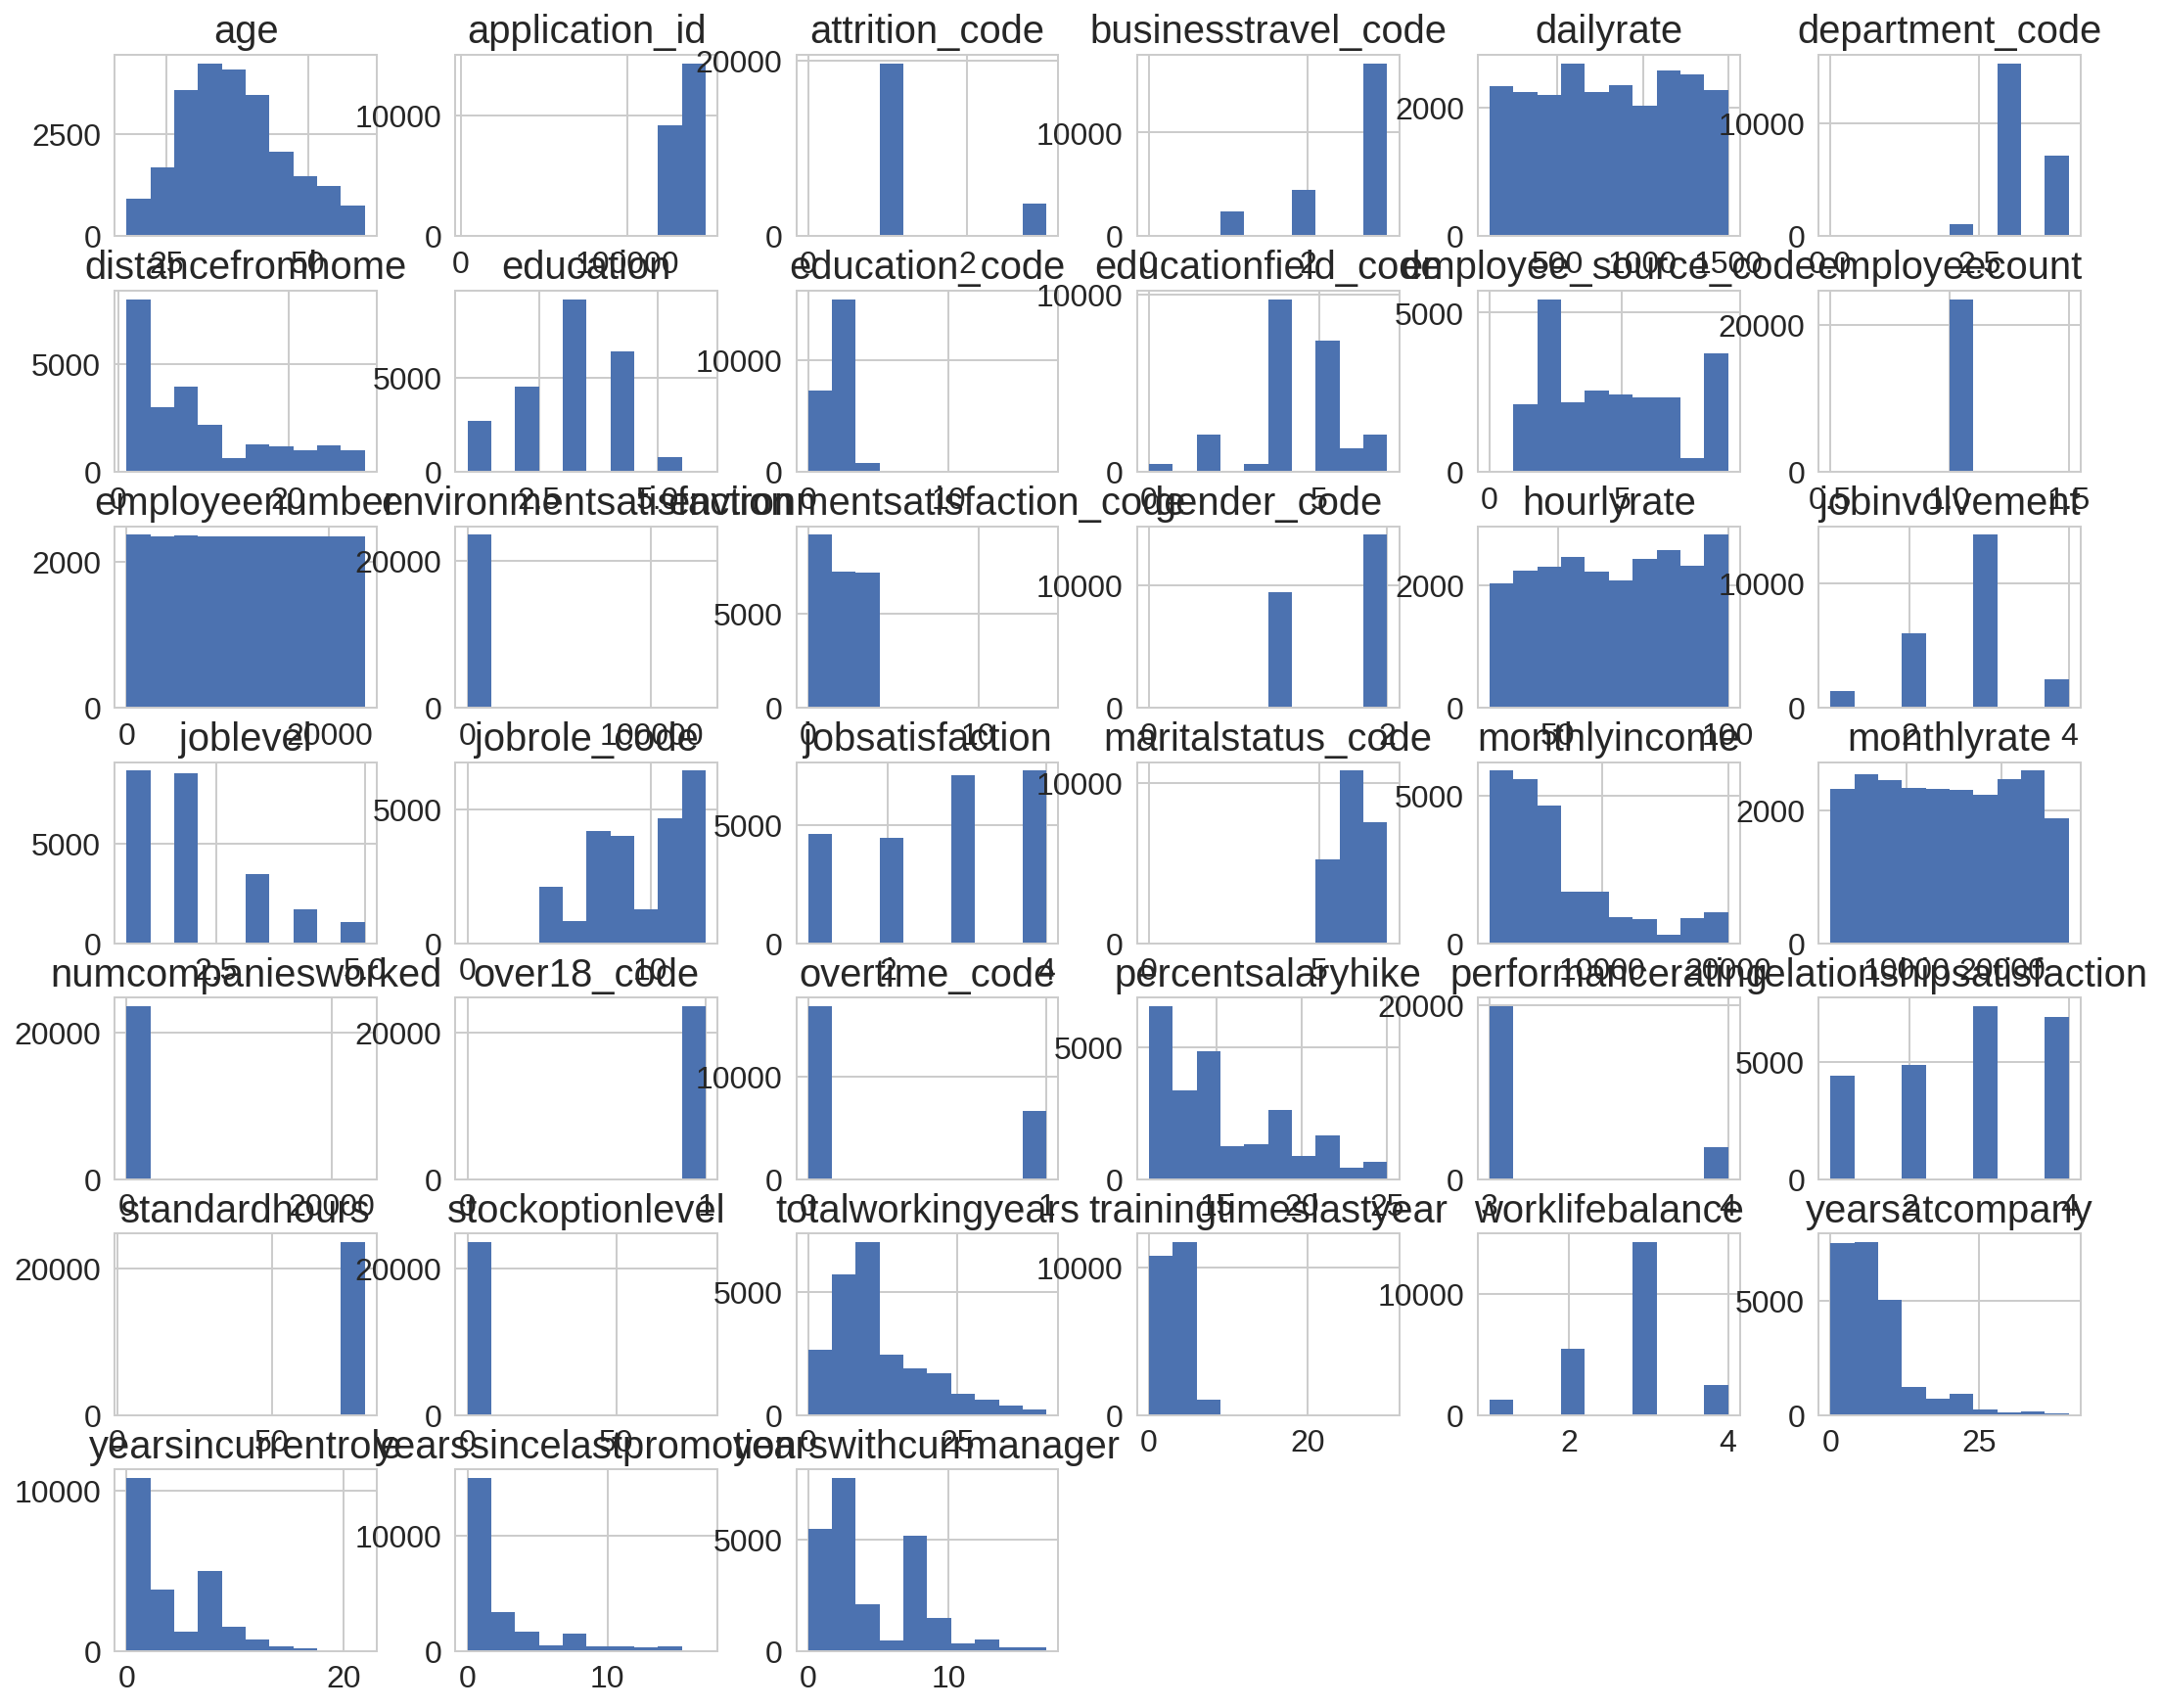

In [14]:
df.hist(figsize=(18,15));

### Employee Source

In [101]:
cw = df.groupby('employee_source').count().drop(0, axis=0)[['age']].loc['Company Website'][0]
seek = df.groupby('employee_source').count().drop(0, axis=0)[['age']].loc['Seek'][0]
ref = df.groupby('employee_source').count().drop(0, axis=0)[['age']].loc['Referral'][0]
all_e = df.groupby('employee_source').count().drop(0, axis=0)[['age']].sum()[0]

print ('{:.0f}% of hires come from company website'.format((cw /  all_e)*100))
print ('{:.0f}% of hires come from Seek'.format((seek /  all_e)*100))
print ('{:.0f}% of hires come from referrals'.format((ref /  all_e)*100))

23% of hires come from company website
16% of hires come from Seek
2% of hires come from referrals


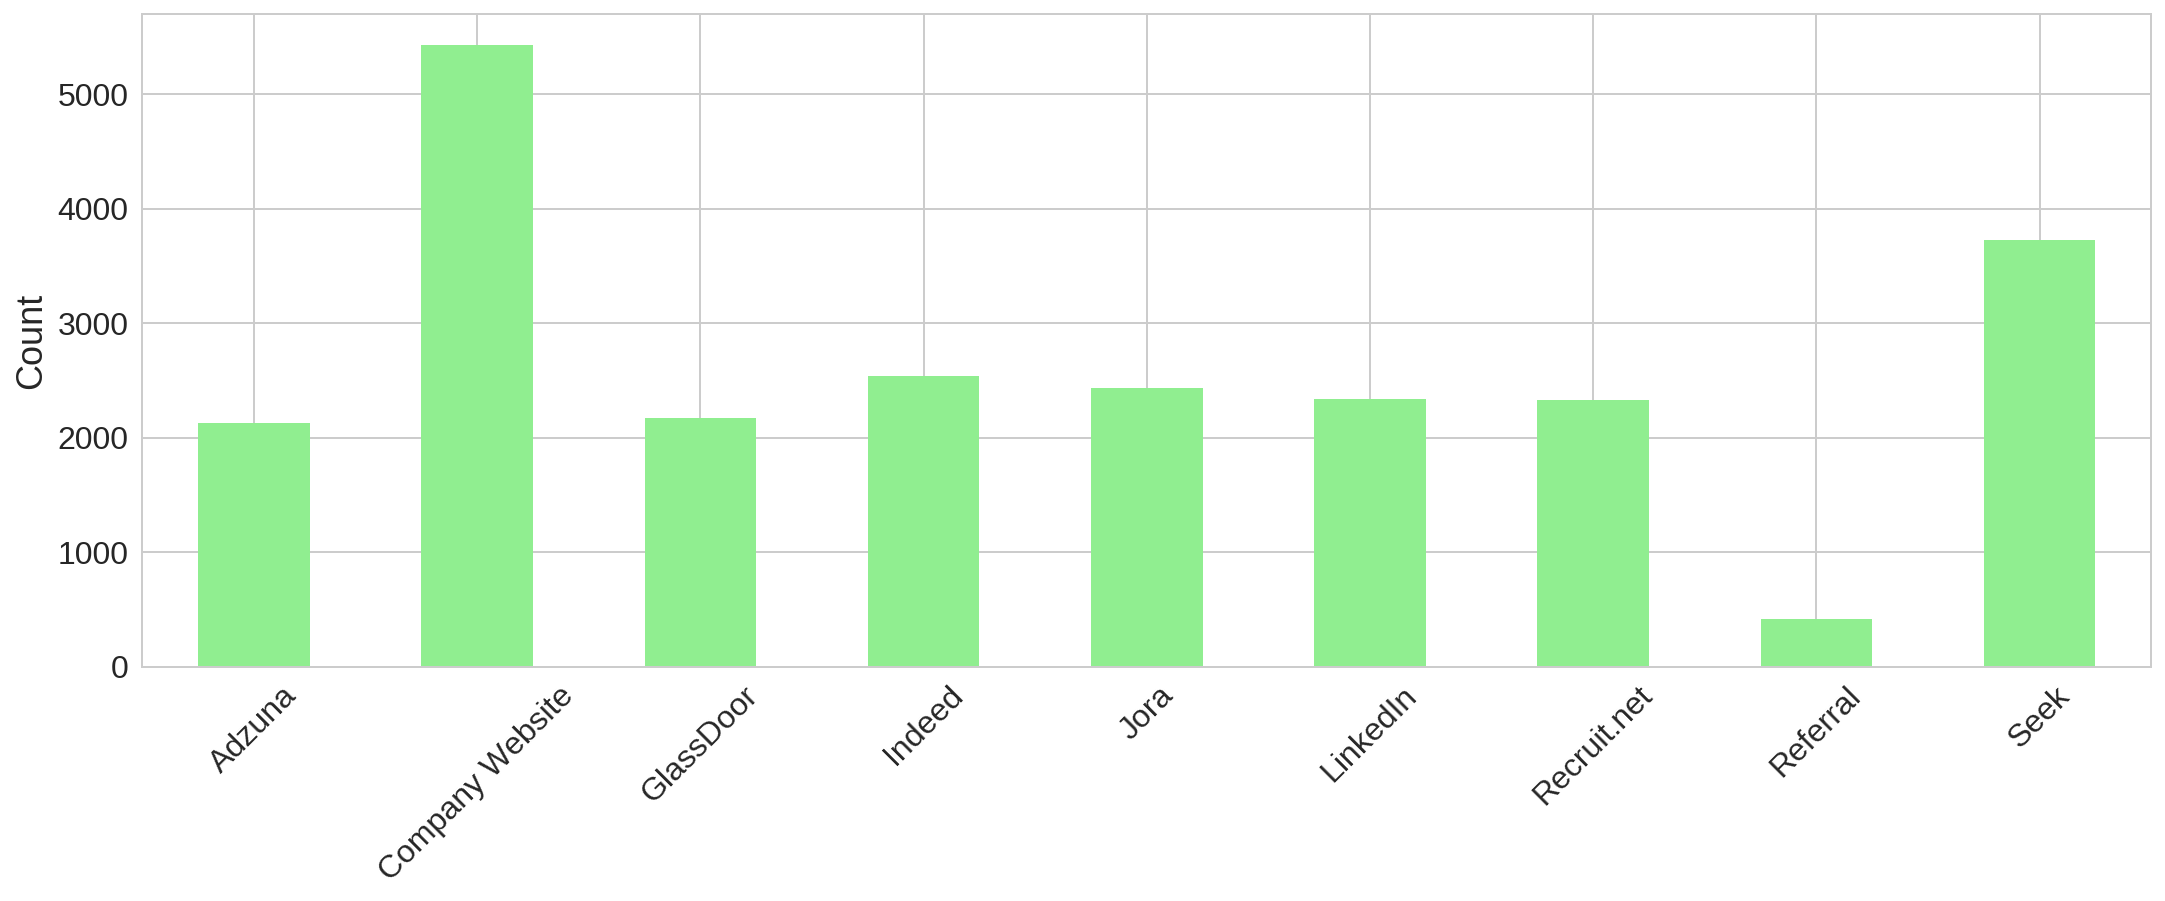

In [142]:
df.groupby('employee_source').count().drop(0, axis=0)[['age']].plot(kind='bar', legend=False, color='lightgreen')
plt.xticks(rotation=45)
plt.xlabel(' ')
plt.ylabel('Count');

### Performance rating by employee source

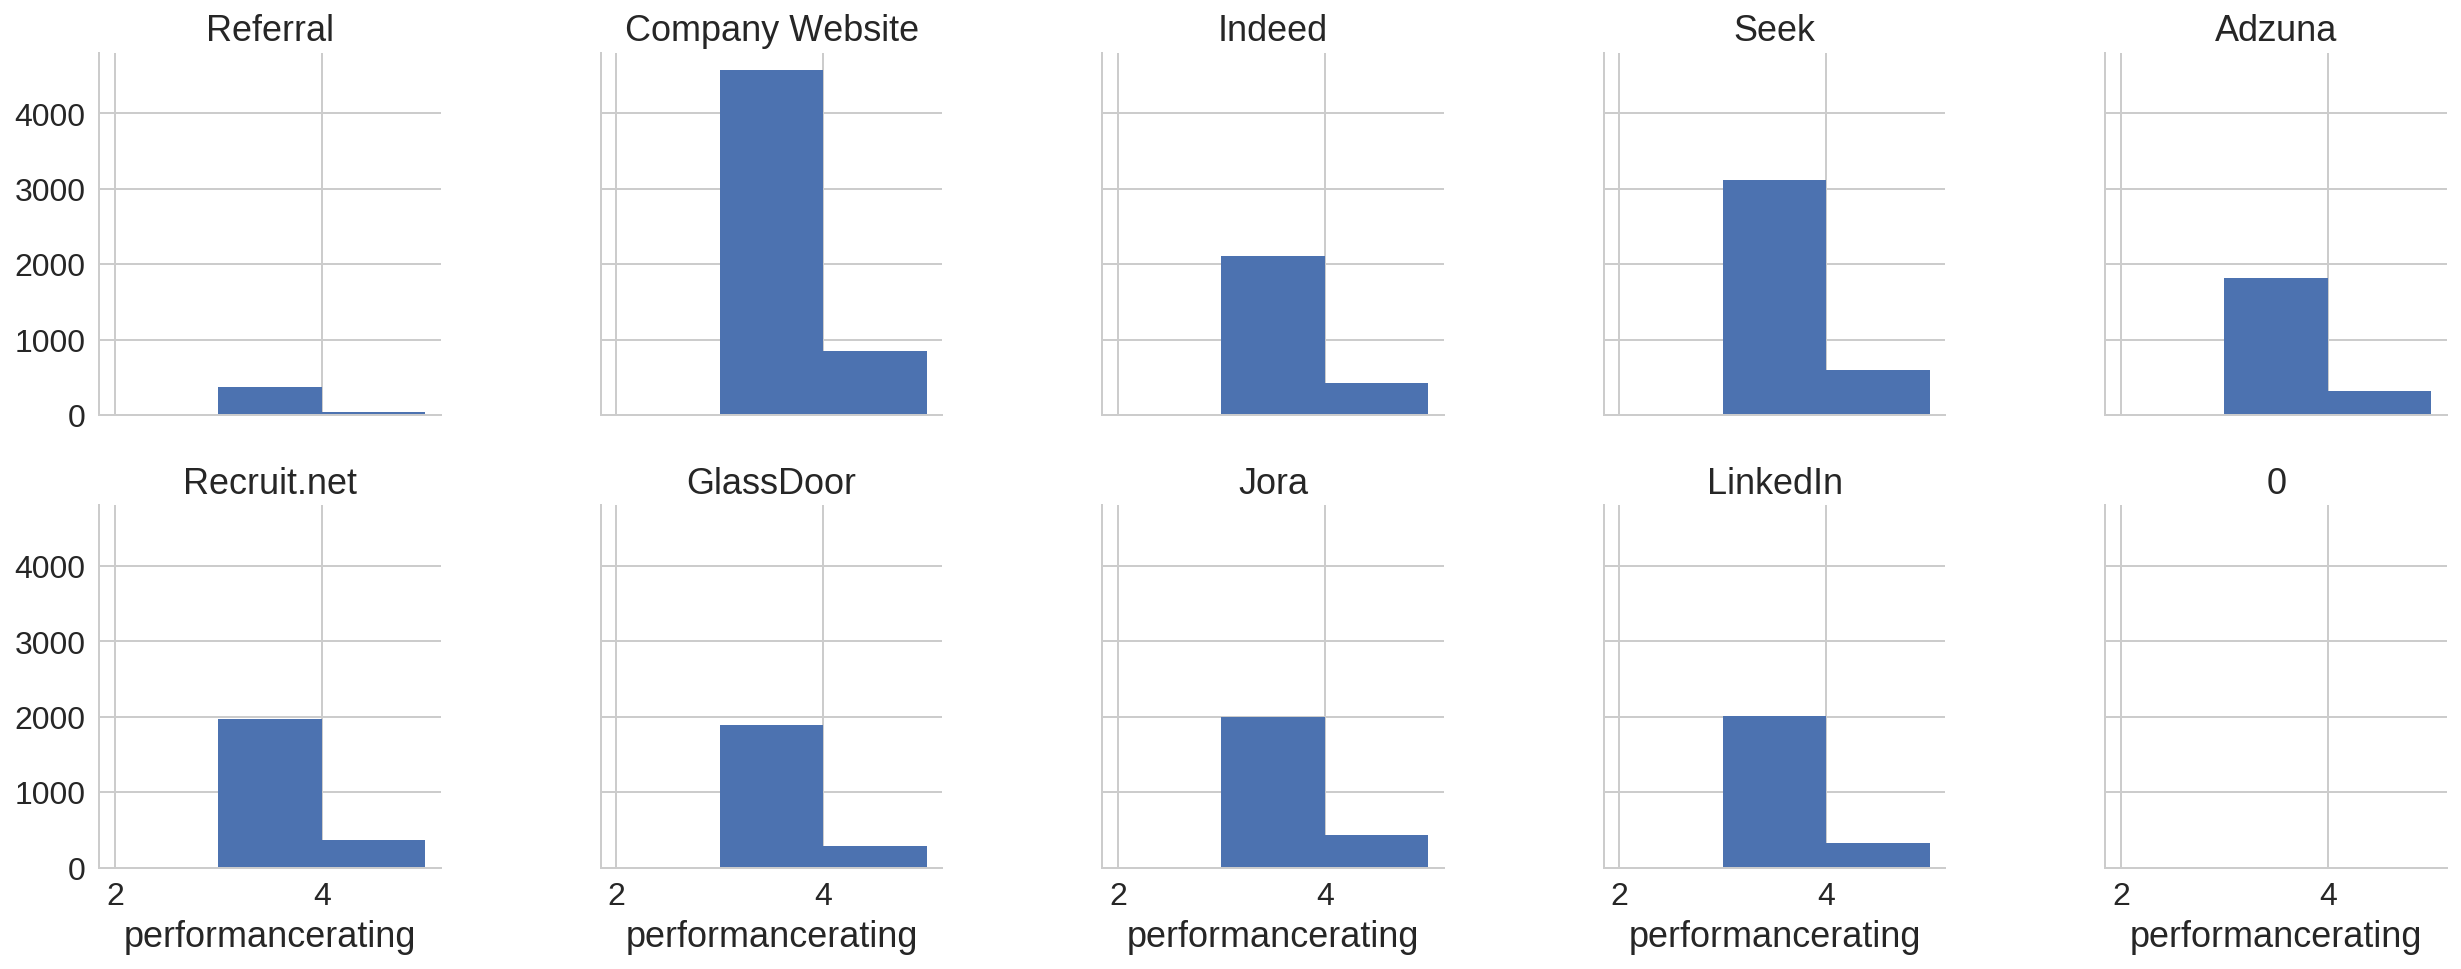

In [65]:
g = sns.FacetGrid(df, col="employee_source", col_wrap=5, size=3.5)
g = (g.map(plt.hist, 'performancerating', bins=np.arange(2, 6)).set_titles("{col_name}"))

### Performance rating based on employment source

In [16]:
## Calculate percentage of performance ratings based on employment source

sources = [s for s in df['employee_source'].unique()]
source_list = []
for source in sources:
    threes = df[(df['employee_source']==source) & (df['performancerating']==3)]['performancerating'].sum()
    fours = df[(df['employee_source']==source) & (df['performancerating']==4)]['performancerating'].sum()
    total_3 = df[df['performancerating']==3]['performancerating'].sum()
    total_4 = df[df['performancerating']==4]['performancerating'].sum()
    source_list.append((source, threes, fours))

In [143]:
rating_df = pd.DataFrame(source_list, columns=('source','threes','fours'))
rating_df['3%'] = rating_df['threes'] /(rating_df['threes']+rating_df['fours'])
rating_df['4%'] = rating_df['fours'] /(rating_df['threes']+rating_df['fours'])

total_3 = rating_df['threes'].sum()
total_4 = rating_df['fours'].sum()

rating_df['3%_total'] = rating_df['threes'] /(total_3 + total_4)
rating_df['4%_total'] = rating_df['fours'] /(total_3 + total_4)
rating_df = rating_df[rating_df['source']!=0]

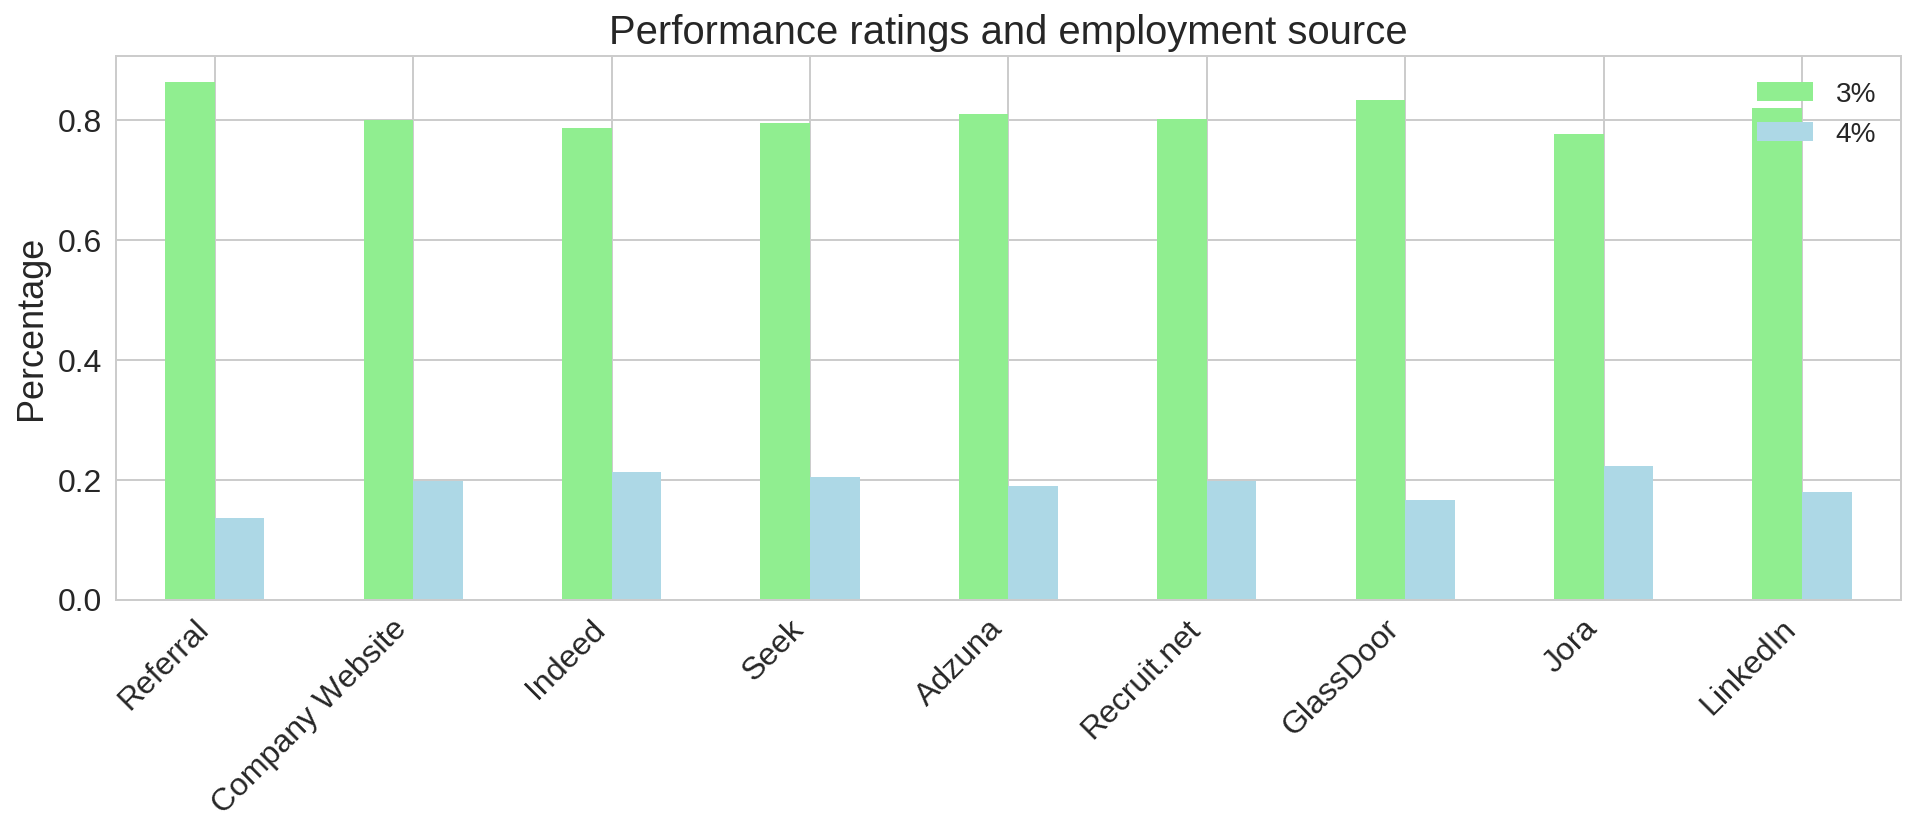

In [141]:
## Plot performance ratings by employment sources

fig, ax = plt.subplots(figsize=(16,5))
rating_df[['3%','4%']].plot(kind='bar', ax=ax, color=['lightgreen','lightblue'])
ax.set_xticklabels(rating_df['source'])
plt.xticks(rotation=45, ha='right')

plt.xlabel(' ')
plt.ylabel('Percentage');
plt.title('Performance ratings and employment source');

In [146]:
t_list = ['Termination','Current employee', 'Voluntary Resignation']
for status in t_list:
    p = df[(df['employee_source']!=0) & (df['attrition']==status)].count()['age']
    tot = df[df['employee_source']!=0].count()['age']
    print ('{} - {:.2f}%'.format(status, (p / tot)*100))


Termination - 0.41%
Current employee - 83.78%
Voluntary Resignation - 15.76%


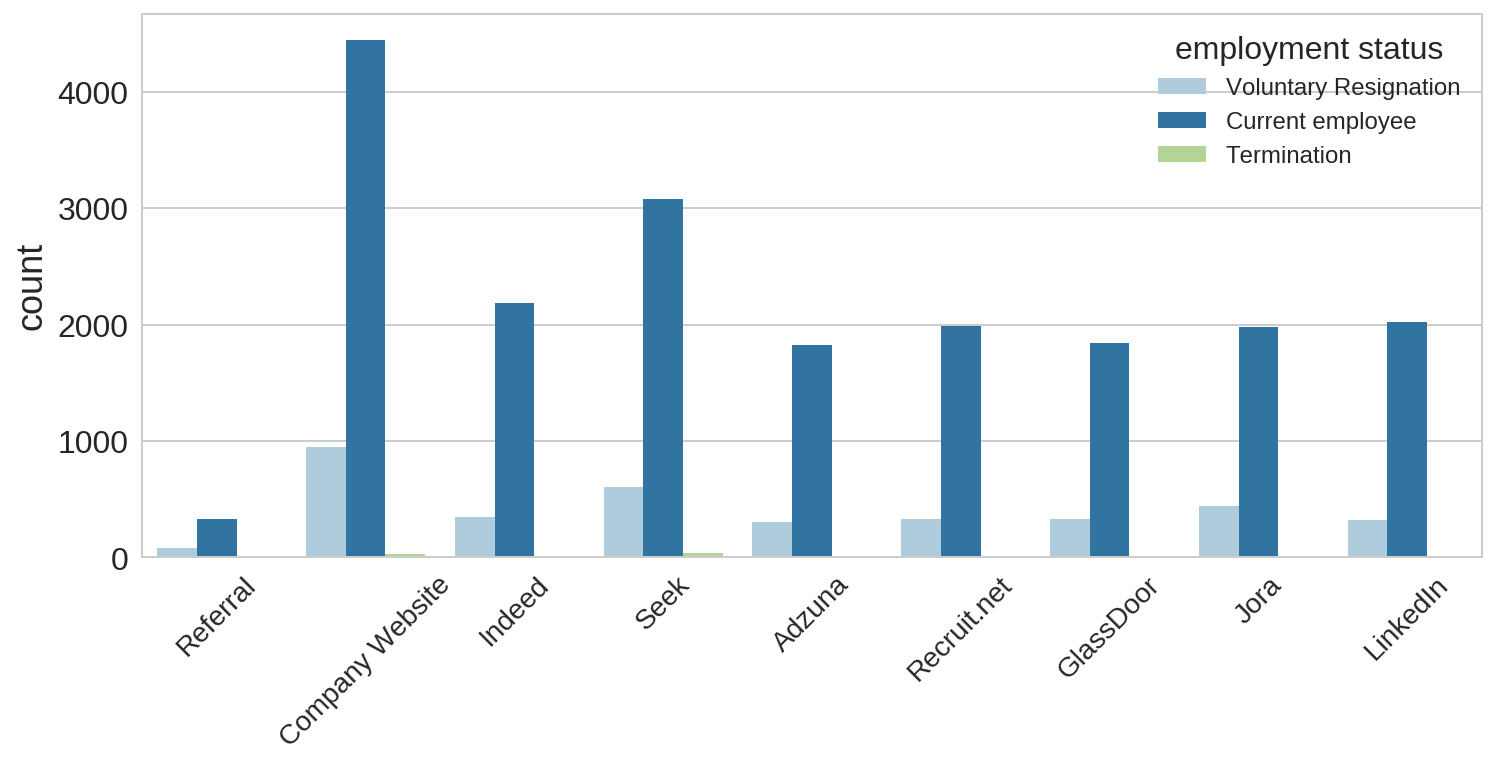

In [127]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='employee_source', hue='attrition', data=df[df['employee_source']!=0], palette='Paired',linewidth=5)
plt.xticks(fontsize=14, rotation=45);
plt.legend(loc=1, title='employment status', fontsize=12)
plt.xlabel('Employee source');

In [221]:
rd = df[df['department']=='Research & Development'].count()['age']
sal = df[df['department']=='Sales'].count()['age']
hr = df[df['department']=='Human Resources'].count()['age']

print ('Research & Development - {:.2f}%\nSales - {:.2f}%\nHuman Resources - {:.2f}%'.format((rd/(rd+sal+hr)*100),(sal/(rd+sal+hr)*100),(hr/(rd+sal+hr)*100)  ))

Research & Development - 65.26%
Sales - 30.41%
Human Resources - 4.33%


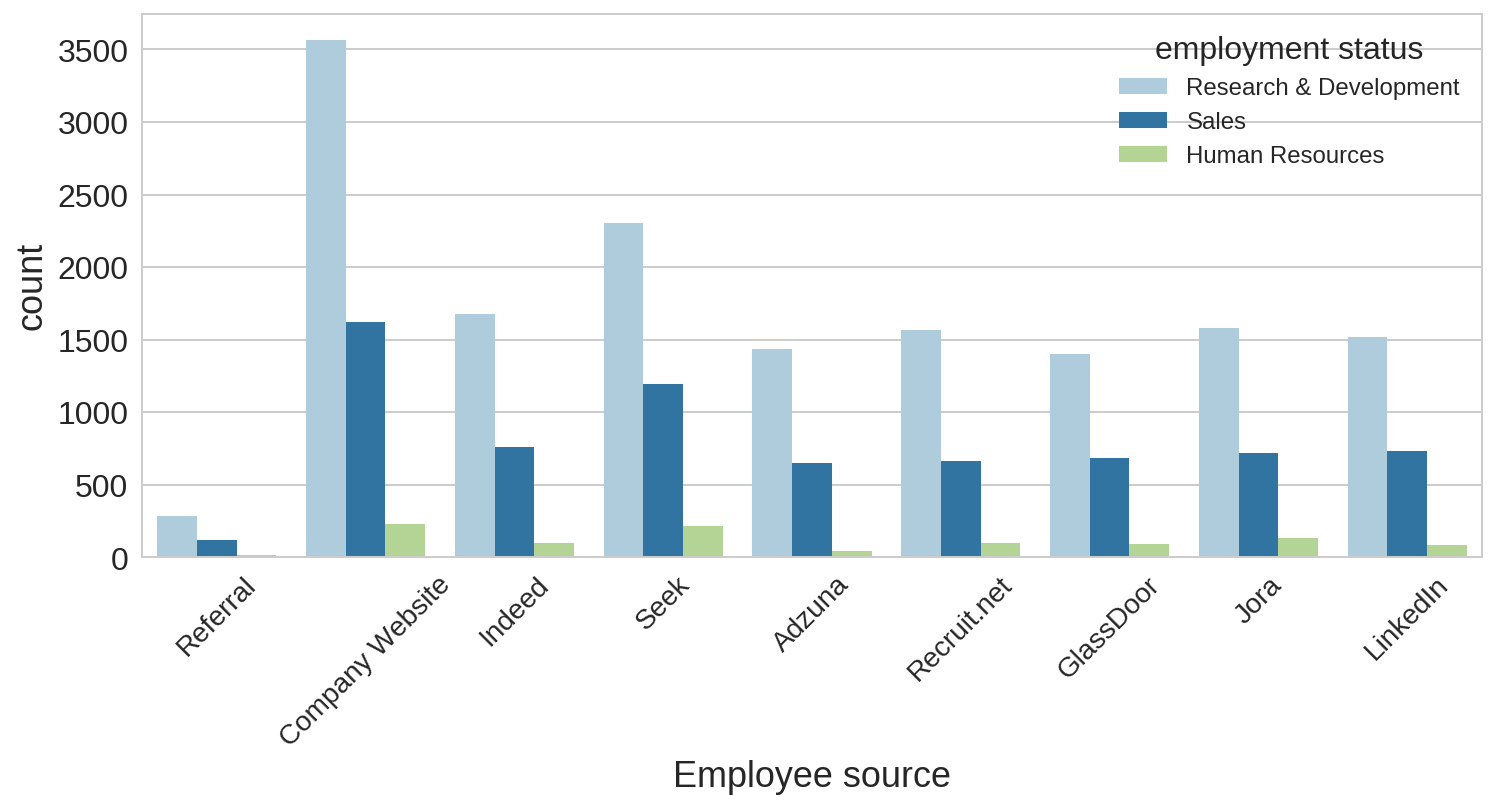

In [216]:
fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='employee_source', hue='department', data=df[df['employee_source']!=0], palette='Paired',
              linewidth=5, hue_order=['Research & Development','Sales','Human Resources'])
plt.xticks(fontsize=14, rotation=45);
plt.legend(loc=1, title='employment status', fontsize=12)
plt.xlabel('Employee source');

In [202]:
df['education']

0        2.0
1        4.0
2        2.0
3        4.0
4        4.0
5        4.0
6        2.0
7        2.0
8        2.0
9        2.0
10       2.0
11       4.0
12       2.0
13       4.0
14       4.0
15       4.0
16       2.0
17       2.0
18       1.0
19       4.0
20       4.0
21       1.0
22       1.0
23       1.0
24       4.0
25       4.0
26       1.0
27       1.0
28       1.0
29       4.0
        ... 
23502    3.0
23503    2.0
23504    2.0
23505    3.0
23506    3.0
23507    3.0
23508    3.0
23509    3.0
23510    3.0
23511    3.0
23512    3.0
23513    3.0
23514    3.0
23515    3.0
23516    3.0
23517    NaN
23518    3.0
23519    3.0
23520    3.0
23521    1.0
23522    1.0
23523    3.0
23524    3.0
23525    3.0
23526    2.0
23527    4.0
23528    3.0
23529    1.0
23530    4.0
23531    3.0
Name: education, Length: 23532, dtype: float64

### Performance and retention

#### Distribution of performance

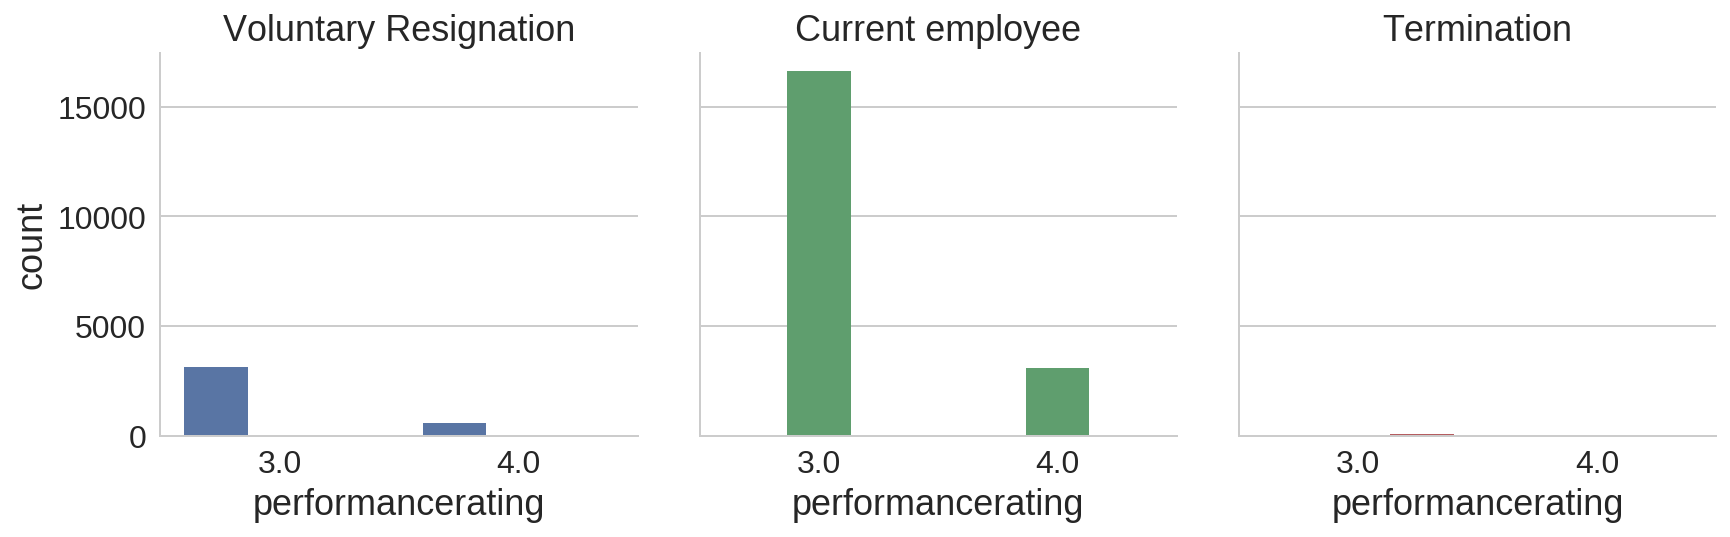

In [20]:
g = sns.factorplot(x="performancerating", hue="attrition", col="attrition",  data=df, estimator=lambda x: len(x) / len(df) * 100, 
                   kind='count',);
g.set_titles("{col_name}");

# g = sns.factorplot(x="performancerating", hue="attrition", data=df[df['attrition']=='Current employee'], kind="count", size=5, palette='Set2', aspect=1.3);
# g.set_titles("{col_name}")

# g = sns.factorplot(x="performancerating", hue="attrition", data=df[df['attrition']=='Current employee'], kind="count", size=5, palette='Set2', aspect=1.3);
# g.set_titles("{col_name}");

# sns.violinplot(y="performancerating",x='attrition', hue="attrition", data=df, bw=.1, scale="area", scale_hue=False);

#### Gender differences

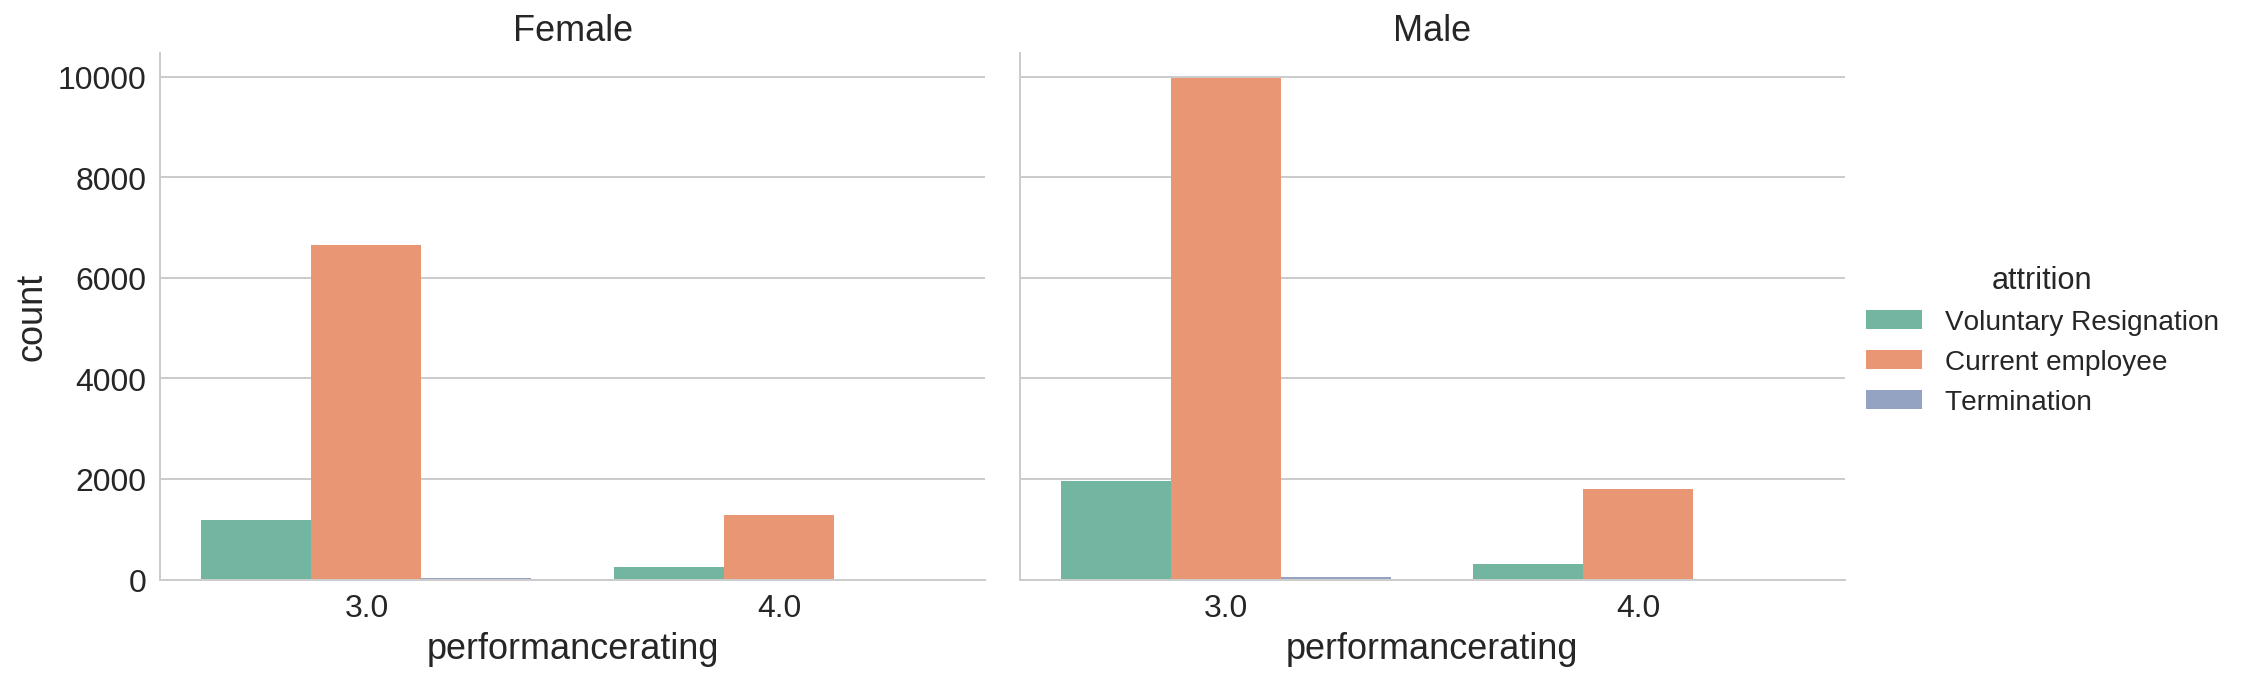

In [21]:
g = sns.factorplot(x="performancerating", hue="attrition", col="gender", data=df, kind="count", size=5, palette='Set2', aspect=1.3);
g.set_titles("{col_name}");

In [22]:
## Female
retention_list = []
fvr = df[(df['attrition']=='Voluntary Resignation') & (df['gender']=='Female')]['age'].count()
fce = df[(df['attrition']=='Current employee') & (df['gender']=='Female')]['age'].count()
ft = df[(df['attrition']=='Termination') & (df['gender']=='Female')]['age'].count()
retention_list.append((fvr/(fvr+fce+ft), fce/(fvr+fce+ft), ft/(fvr+fce+ft)))
## Male
mvr = df[(df['attrition']=='Voluntary Resignation') & (df['gender']=='Male')]['age'].count()
mce = df[(df['attrition']=='Current employee') & (df['gender']=='Male')]['age'].count()
mt = df[(df['attrition']=='Termination') & (df['gender']=='Male')]['age'].count()
retention_list.append((mvr/(mvr+mce+mt), mce/(mvr+mce+mt), mt/(mvr+mce+mt)))

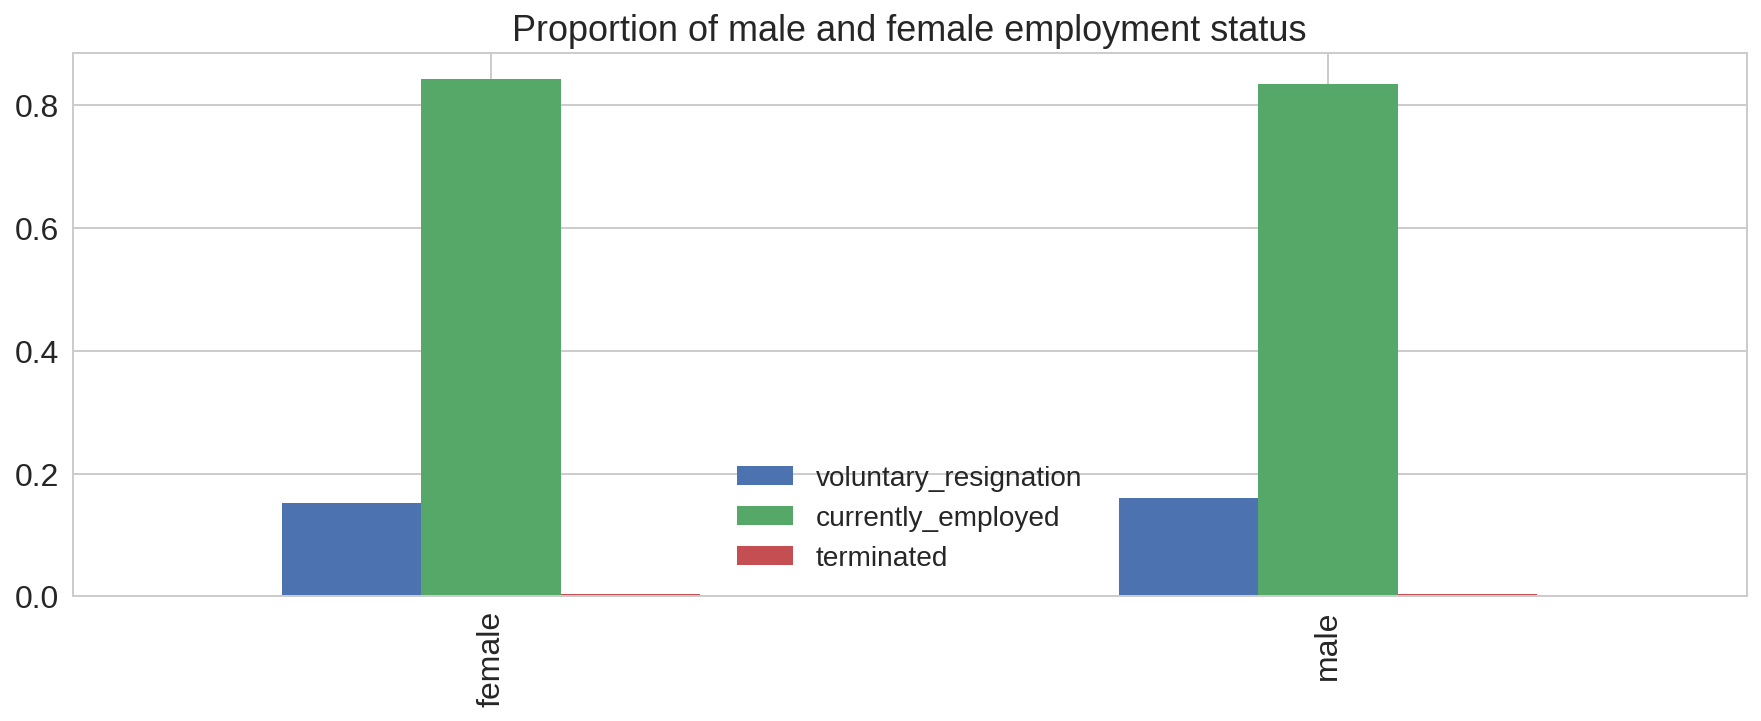

In [23]:
fig, ax = plt.subplots(figsize=(15,5))
emp_df = pd.DataFrame(retention_list, columns=('voluntary_resignation','currently_employed','terminated'), index=('female','male'))

emp_df.plot(kind='bar', ax=ax)
plt.title('Proportion of male and female employment status', fontsize=18);

Gender does not seem to have an impact on attrition and job performance

### Performance and job satisfation

In [159]:
three = df[df['performancerating']==3].count()['employeecount']
four = df[df['performancerating']==4].count()['employeecount']
print ('Threes - {:.2f}%\nFours - {:.2f}%'.format((three / (three +four))*100, (four / (three +four))*100))

Threes - 84.48%
Fours - 15.52%


In [213]:
df[(df['performancerating']==4) & (df['attrition']=='Voluntary Resignation')].groupby('department').count().index

Index([u'Human Resources', u'Research & Development', u'Sales'], dtype='object', name=u'department')

### Retention and Job satisfaction

#### Years at company - Distribution of years worked at company based on work-life balance and job satisfaction 

In [264]:
# df[df['jobsatisfaction']==1]['performancerating'].median()
df[df['jobsatisfaction']==5]['yearsatcompany'].median()

nan

In [28]:
## Average years at company 
df['yearsatcompany'].median(),df['yearsatcompany'].mean(), df['yearsatcompany'].min(), df['yearsatcompany'].max()

(5.0, 7.0057400399676855, 0.0, 40.0)

Terminated employees with low job satisfaction tend to work more years at the company than the average employee. Low satisfied employees who have been terminated worked 10 years, on average while the average employee tends to work at the company for 5 years. 

Employees who low work-life balance tend to voluntarily resign sooner than employees with high work-life balance.

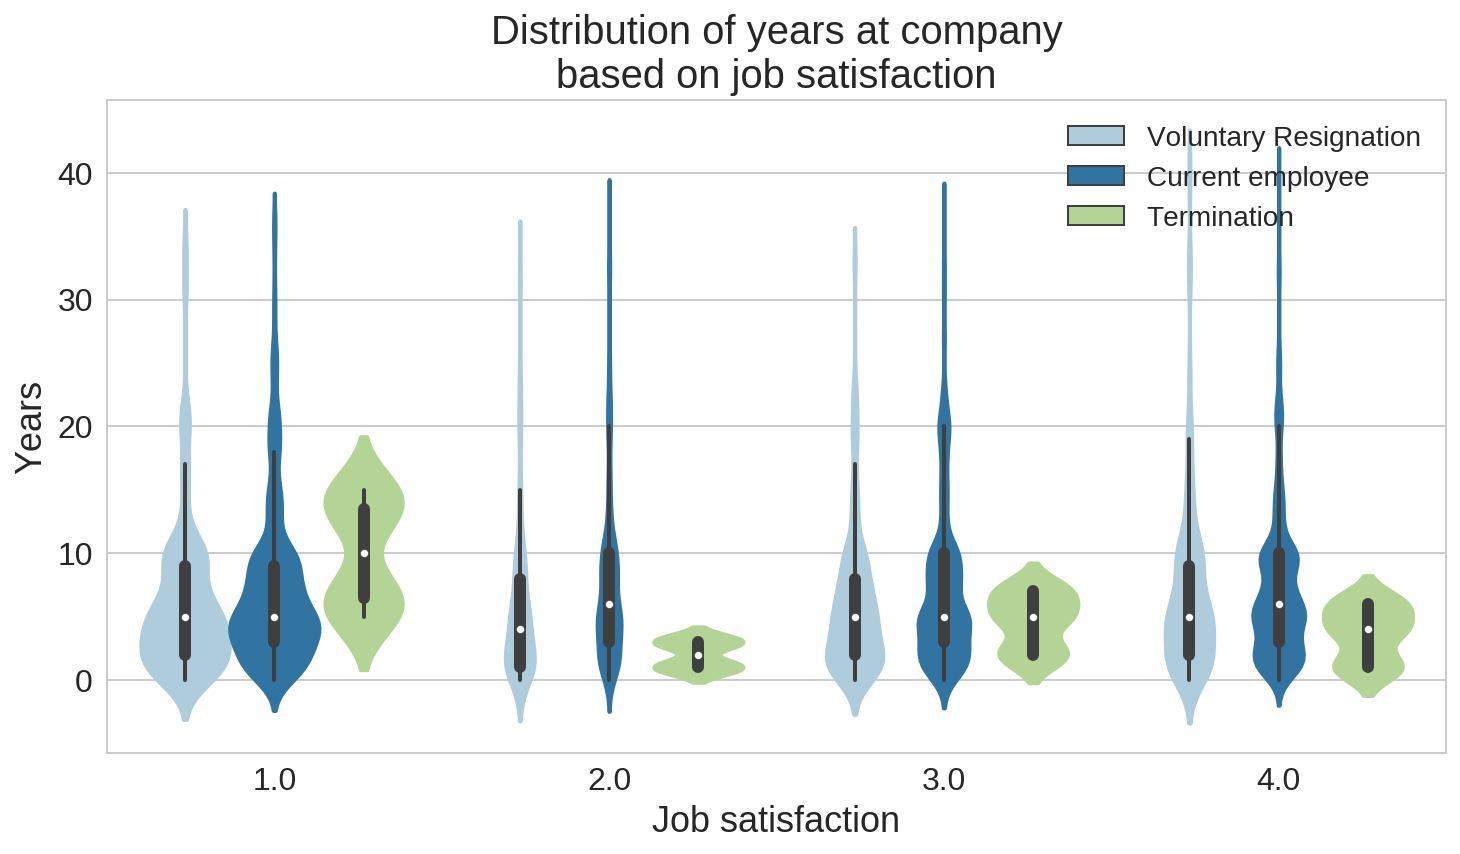

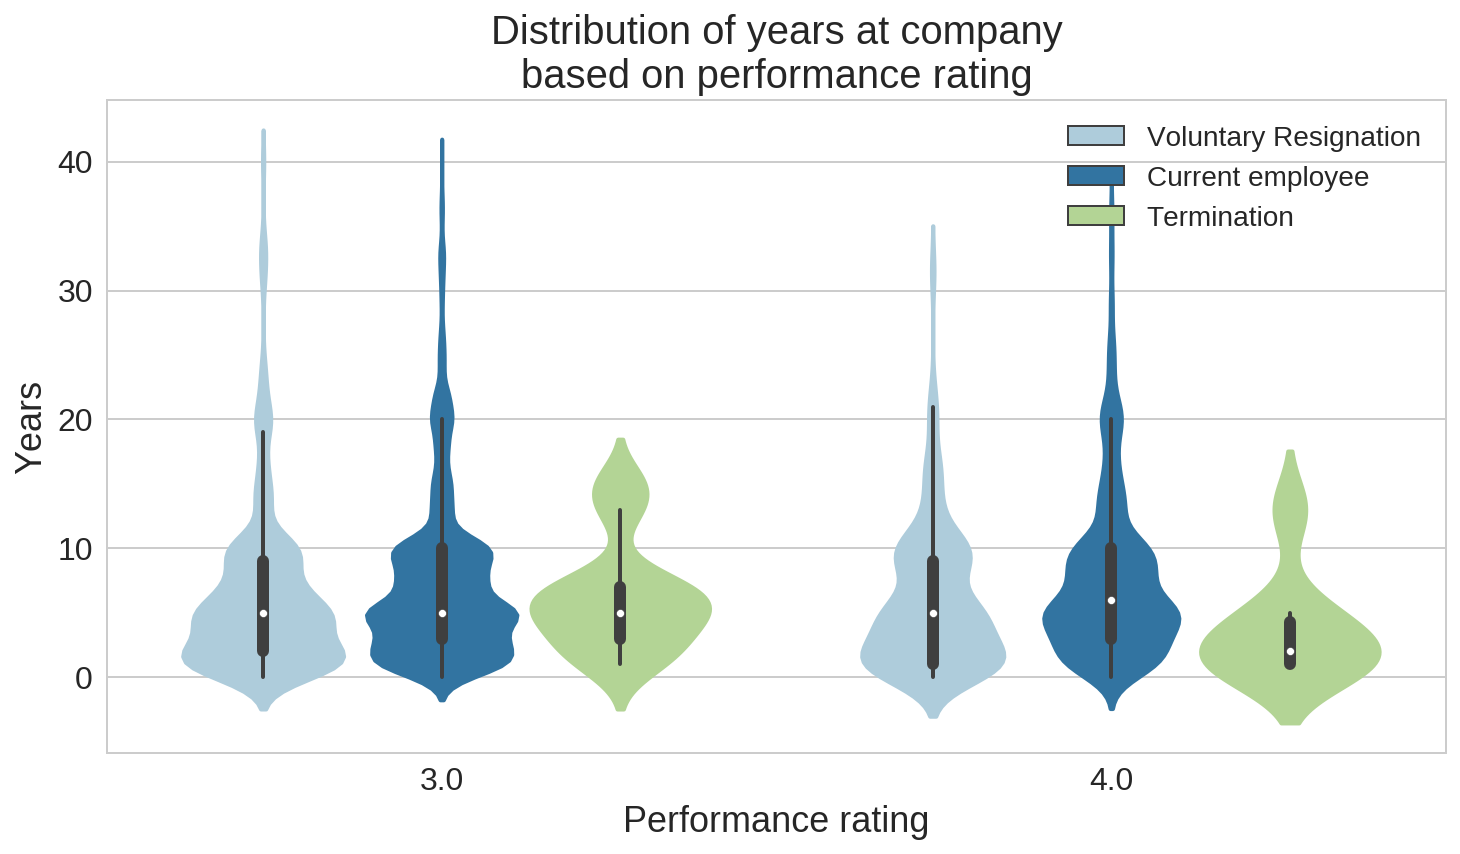

In [147]:
plt.figure(figsize=(12,6))
## Job satisfaction and number of years at company
ax1 = plt.subplot(111)
ax1 = sns.violinplot(x="jobsatisfaction", y="yearsatcompany", hue='attrition', data=df, palette='Paired')#, estimator=lambda x: len(x) / len(df) * 100)
plt.title('Distribution of years at company\nbased on job satisfaction',)
plt.legend(loc=0)
ax1.set(ylabel="Years")
plt.xlabel('Job satisfaction');

plt.figure(figsize=(12,6))
ax2 = plt.subplot(111)
ax2 = sns.violinplot(x="performancerating", y="yearsatcompany", hue='attrition', data=df, palette='Paired')#, estimator=lambda x: len(x) / len(df) * 100)
plt.title('Distribution of years at company\nbased on performance rating',)
plt.legend(loc=0)
ax2.set(ylabel="Years")
plt.xlabel('Performance rating')


#### Job satisfaction & number of years at company - split by attrition 

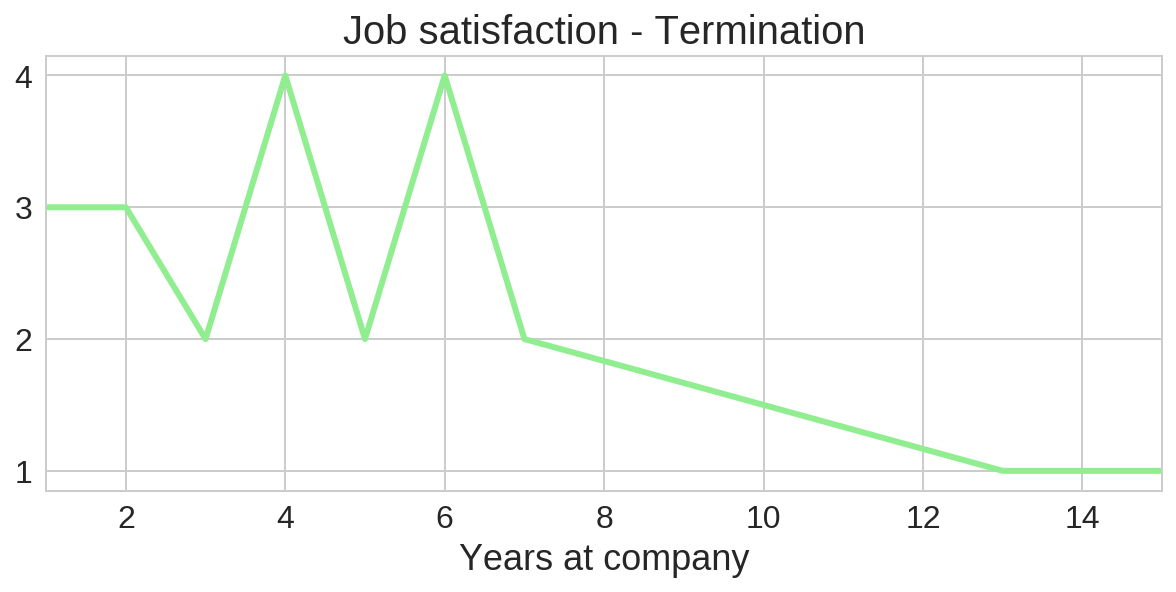

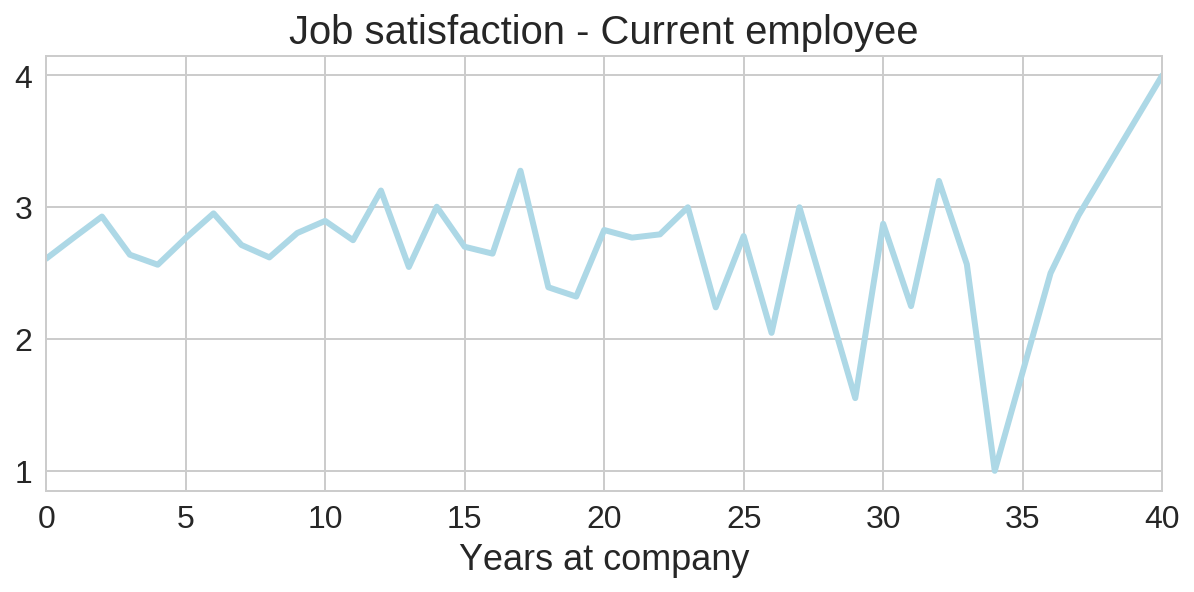

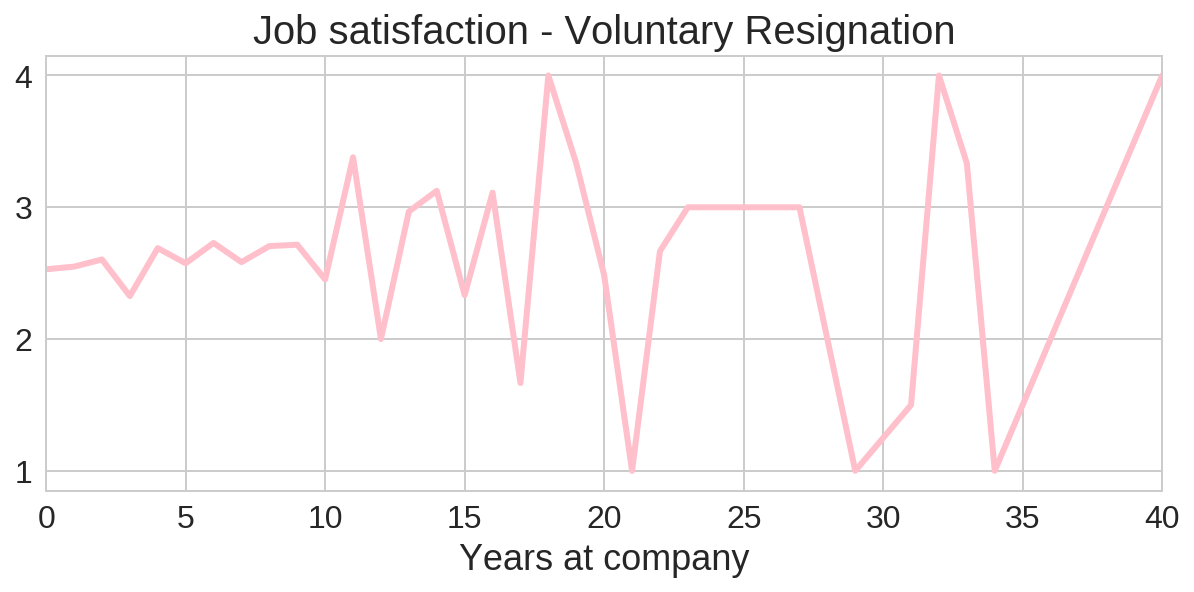

In [192]:
# df.groupby('yearsatcompany').median()['jobsatisfaction'].plot()
fig, ax = plt.subplots(figsize=(10,4))
df[df['attrition']=='Termination'].groupby('yearsatcompany').mean()['jobsatisfaction'].plot(color='lightgreen',lw=3)
plt.title('Job satisfaction - Termination')
plt.xlabel('Years at company')
fig, ax = plt.subplots(figsize=(10,4))
df[df['attrition']=='Current employee'].groupby('yearsatcompany').mean()['jobsatisfaction'].plot(color='lightblue',lw=3)
plt.title('Job satisfaction - Current employee')
plt.xlabel('Years at company')
fig, ax = plt.subplots(figsize=(10,4))
df[df['attrition']=='Voluntary Resignation'].groupby('yearsatcompany').mean()['jobsatisfaction'].plot(color='pink', lw=3)
plt.title('Job satisfaction - Voluntary Resignation')
plt.xlabel('Years at company');

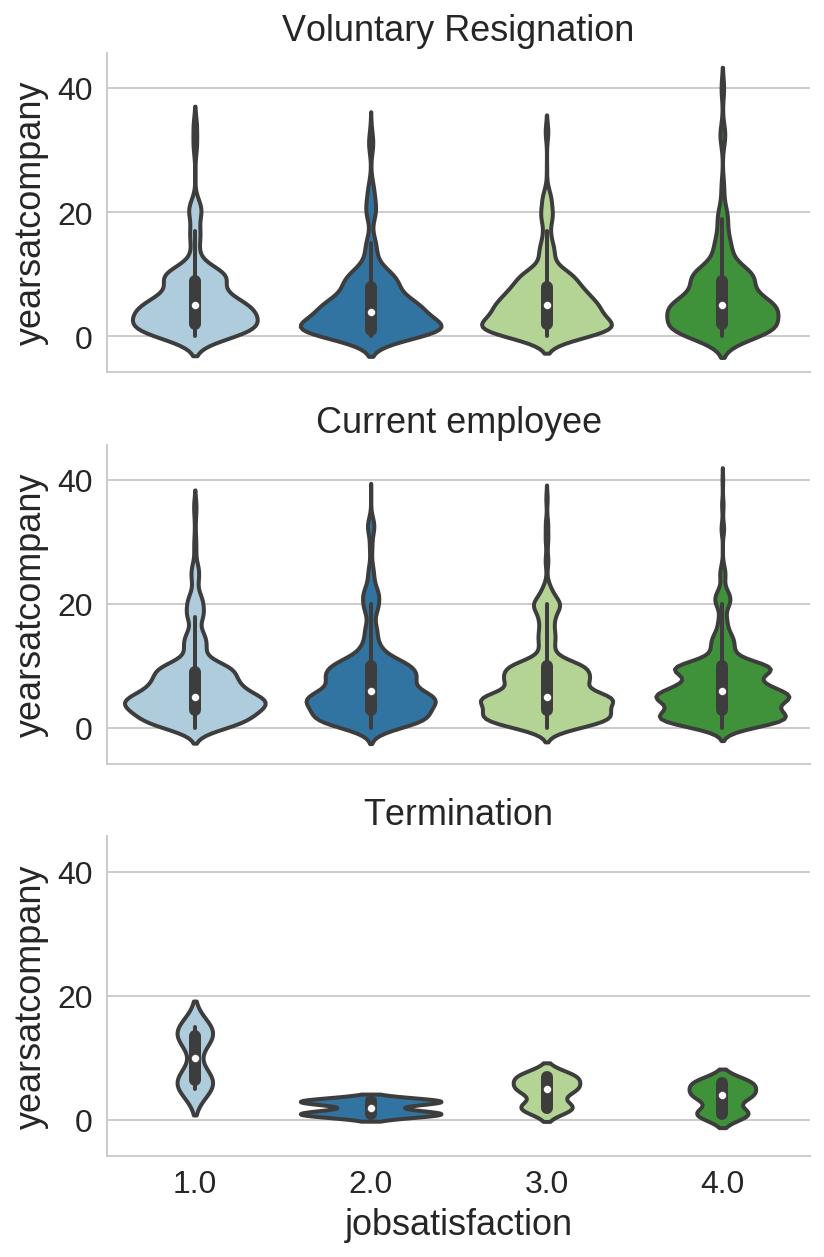

In [200]:

sns.factorplot(x="jobsatisfaction", y="yearsatcompany",
               row="attrition", data=df, kind="violin", size=3, aspect=2, palette='Paired').set_titles("{row_name}");

#### Job satisfaction & number of years since promotion - split by attrition 

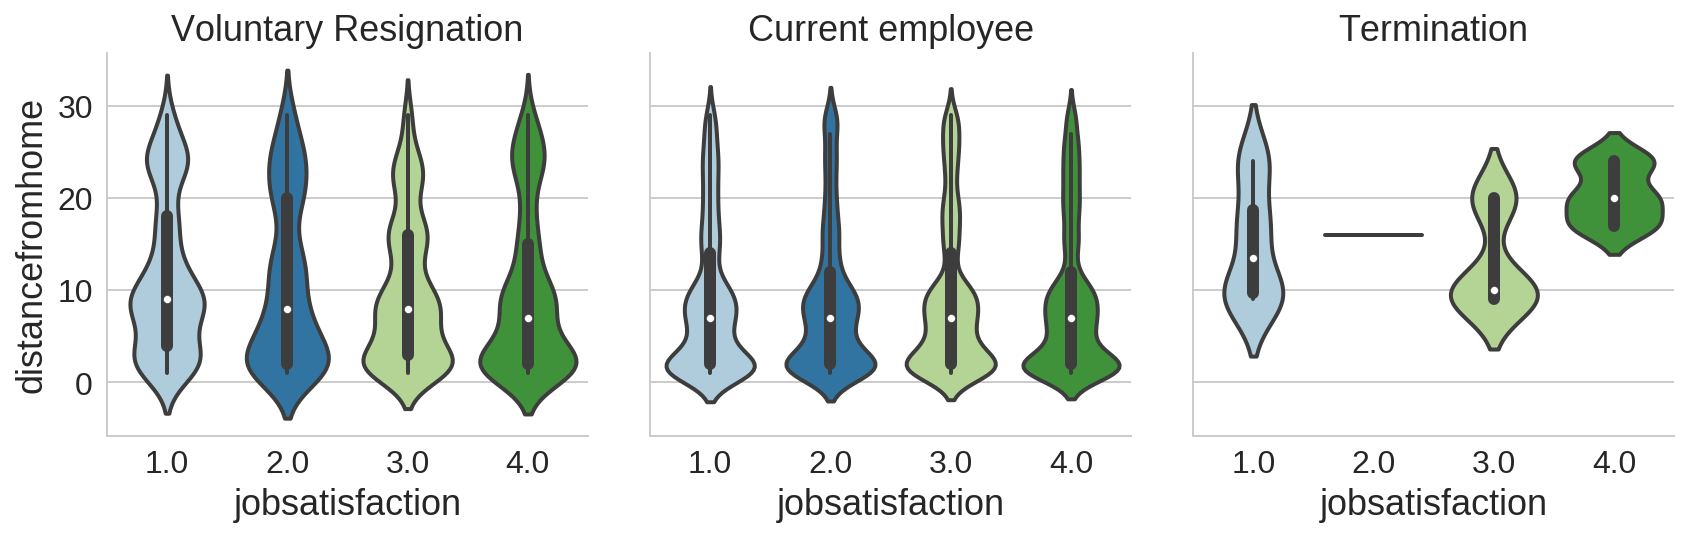

In [161]:
sns.factorplot(x="jobsatisfaction", y="distancefromhome",
               col="attrition", data=df, kind="violin", size=4, aspect=1, palette='Paired').set_titles("{col_name}");

#### Job satisfaction based on departmet split by attrition 

In [244]:
t_list = ['Termination','Current employee', 'Voluntary Resignation']
d_list =['Research & Development','Sales','Human Resources']
for status in t_list:
    print status
    for job in d_list:
        p = df[(df['department']==job) & (df['attrition']==status)]['jobsatisfaction'].mean()
#         tot = df[df['employee_source']!=0].count()['age']
        print ('{:.2f} {}'.format(  p, job))


Termination
2.25 Research & Development
2.75 Sales
nan Human Resources
Current employee
2.75 Research & Development
2.77 Sales
2.71 Human Resources
Voluntary Resignation
2.61 Research & Development
2.57 Sales
2.68 Human Resources


In [237]:
rd = df[(df['department']=='Research & Development') & (df['attrition']=='Termination')]['jobsatisfaction'].median()
sal = df[df['department']=='Sales']['jobsatisfaction'].median()
hr = df[df['department']=='Human Resources']['jobsatisfaction'].median()
rd

2.0

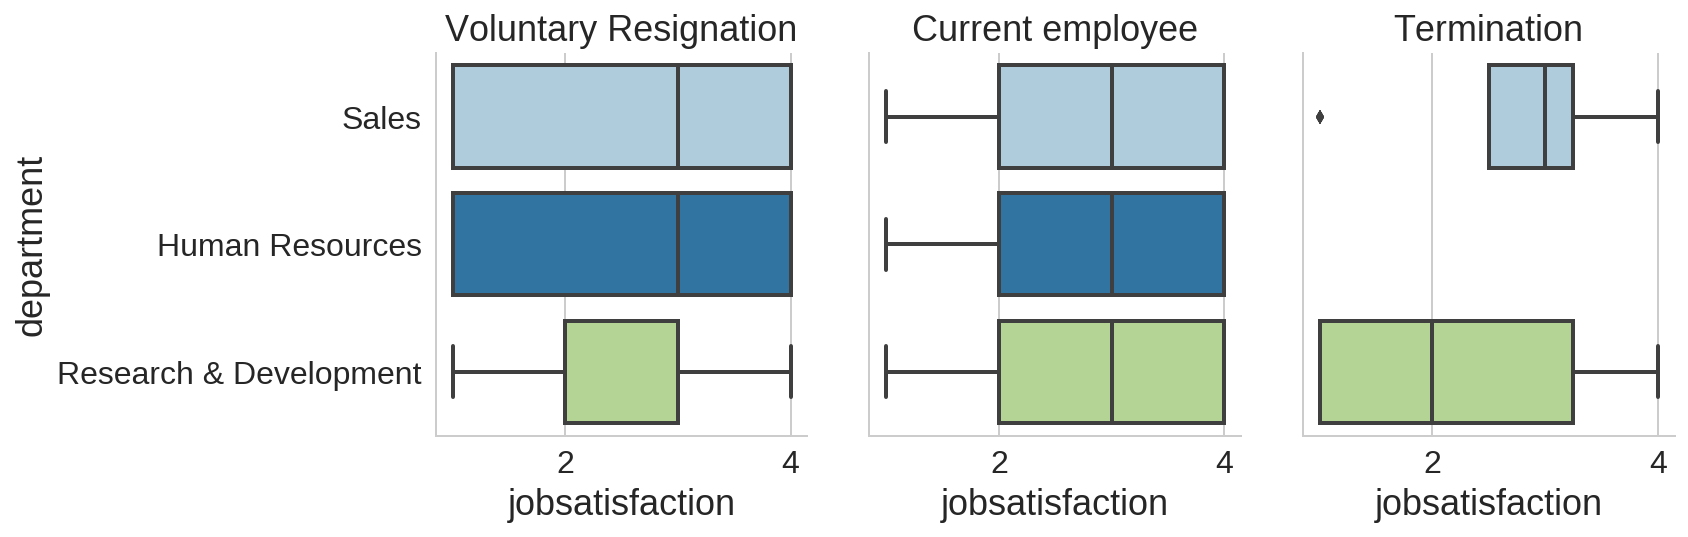

In [236]:
sns.factorplot(x="jobsatisfaction", y="department",
               col="attrition", data=df[df['department']!=1296], kind="box", size=4, aspect=1, palette='Paired').set_titles("{col_name}");

#### Job satisfaction based on education split by attrition 

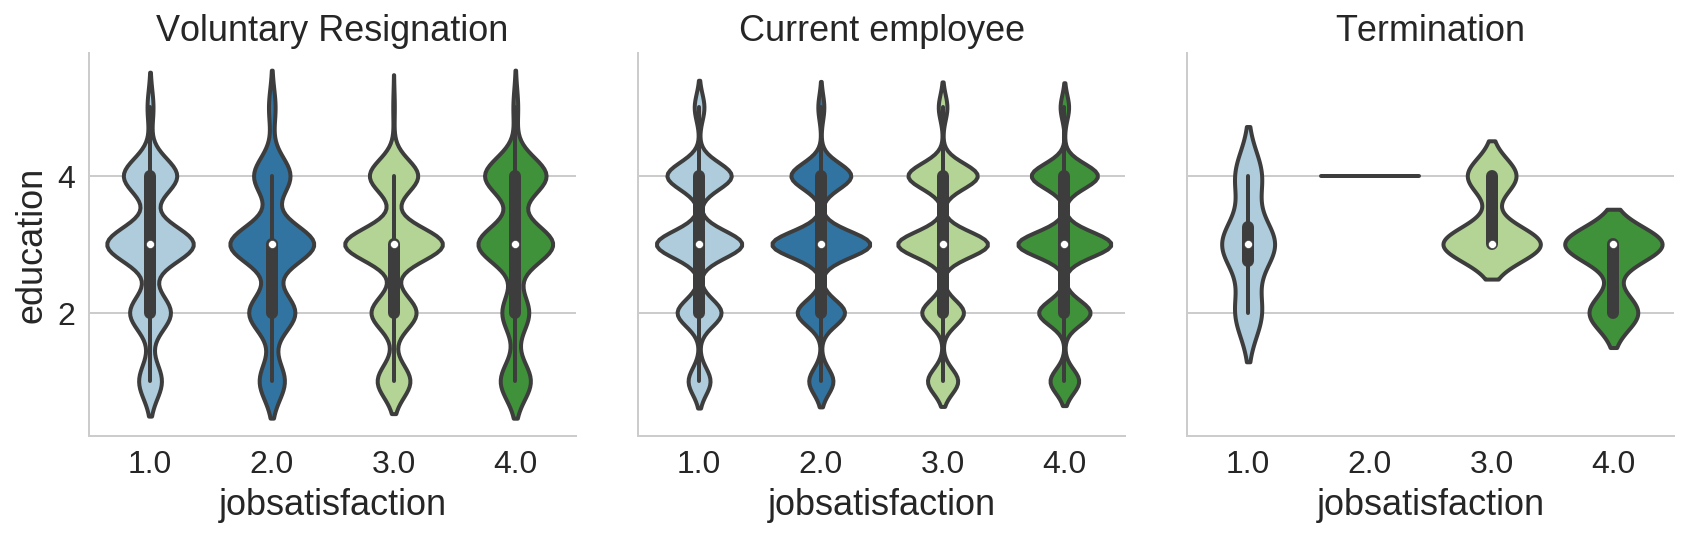

In [227]:
sns.factorplot(x="jobsatisfaction", y="education",
               col="attrition", data=df, kind="violin", size=4, aspect=1, palette='Paired').set_titles("{col_name}");

#### Job satisfation & percentage salary increase - split by attrition

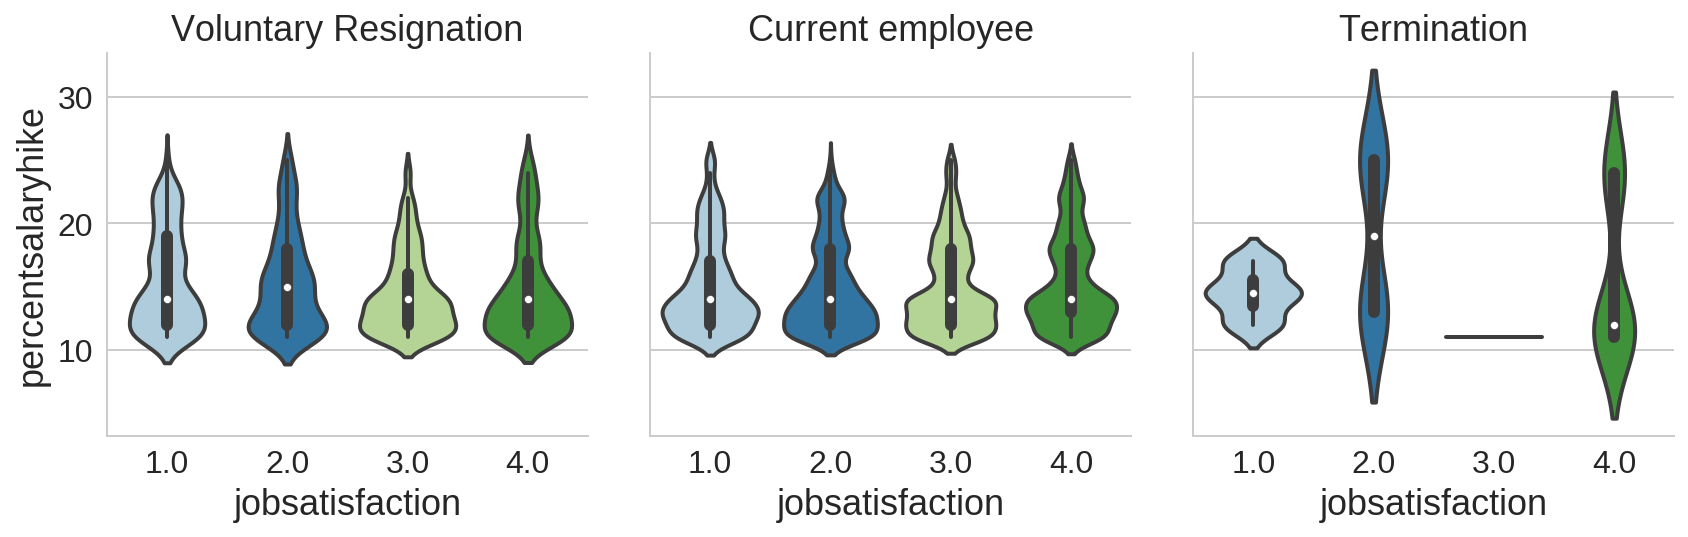

In [163]:
sns.factorplot(x="jobsatisfaction", y="percentsalaryhike",
               col="attrition", data=df, kind="violin", size=4, aspect=1, palette='Paired').set_titles("{col_name}");

 #### Gender differences

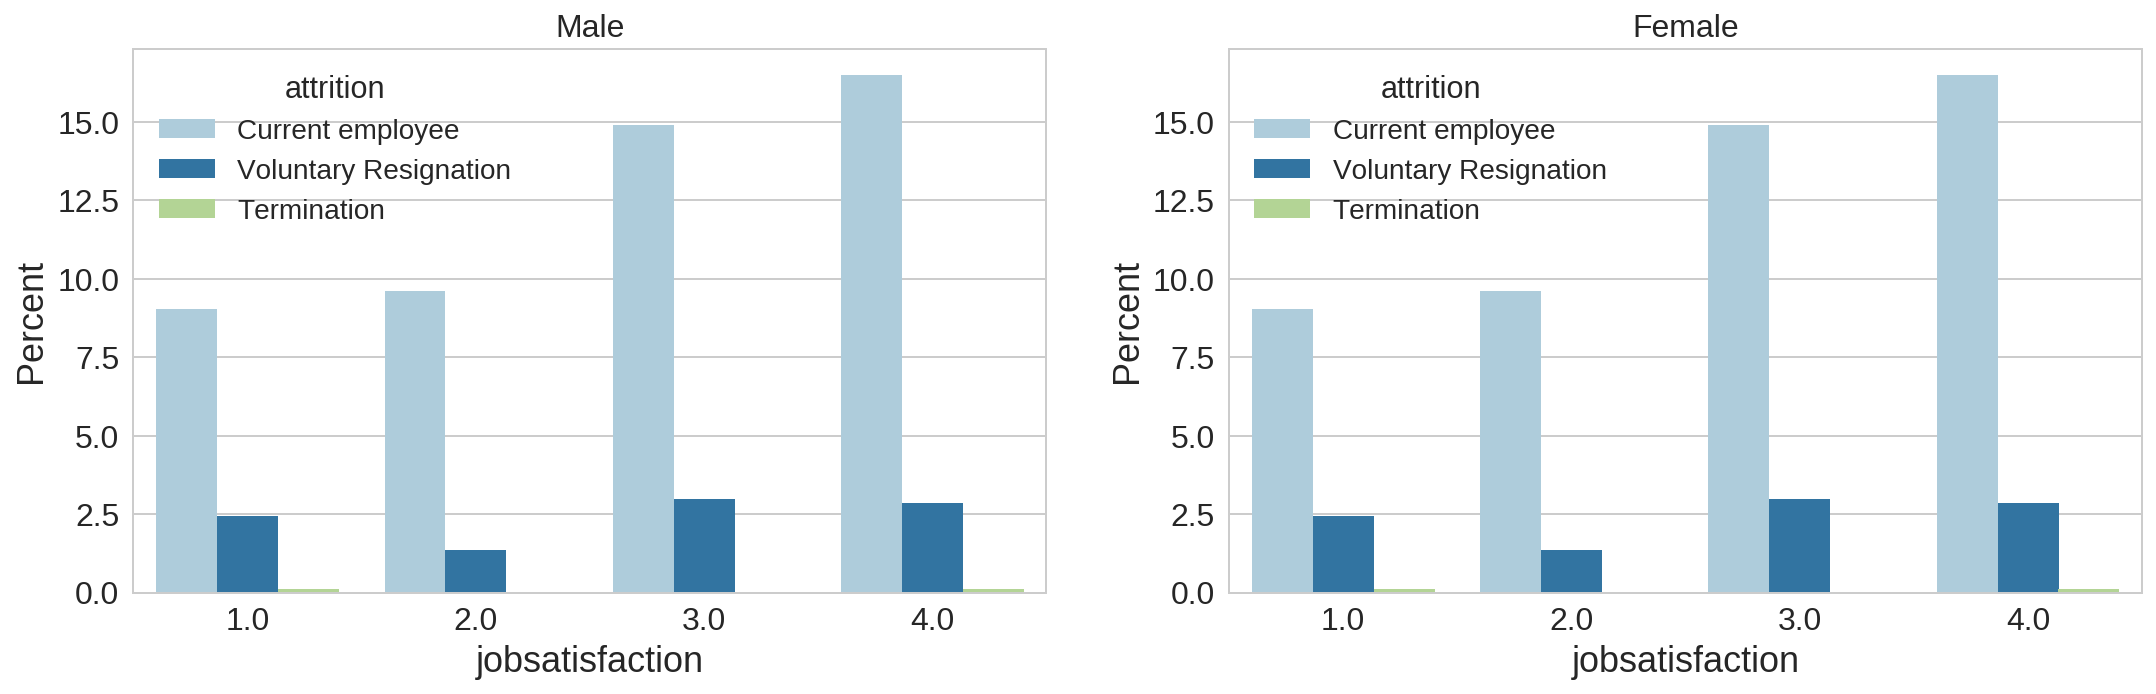

In [166]:
plt.figure(figsize=(18,5))
plt.subplot(121)
ax1 = sns.barplot(x="jobsatisfaction", y="jobsatisfaction", hue='attrition', data=df[df['gender']=='Male'], 
                  estimator=lambda x: len(x) / len(df) * 100, palette='Paired')
plt.title('Male',fontsize=16)
ax1.set(ylabel="Percent")
plt.subplot(122)
ax2 = sns.barplot(x="jobsatisfaction", y="jobsatisfaction", hue='attrition', data=df[df['gender']=='Male'], 
                  estimator=lambda x: len(x) / len(df) * 100, palette='Paired')
plt.title('Female',fontsize=16)
ax2.set(ylabel="Percent");

### Monthly income, satisfaction and work life balance and performance

In [31]:
df['monthlyincome'].median(), df['percentsalaryhike'].median(), df['hourlyrate'].median()

df['monthlyincome'].median(), df[(df['attrition']=='Termination') & (df['jobsatisfaction']==1)]['monthlyincome'].median()
df['monthlyincome'].median(), df[df['attrition']=='Termination']['monthlyincome'].median()

(4936.0, 4559.0)

Terminated employees with low job satisfaction tend to earn more than the average employee. Low satisfied employees who have been terminated tend to earn aproximately $8,000 a month while the average employe earns about $5,000 a month. 

Terminated employees whose income is lower than the average also rate work-life balance low 

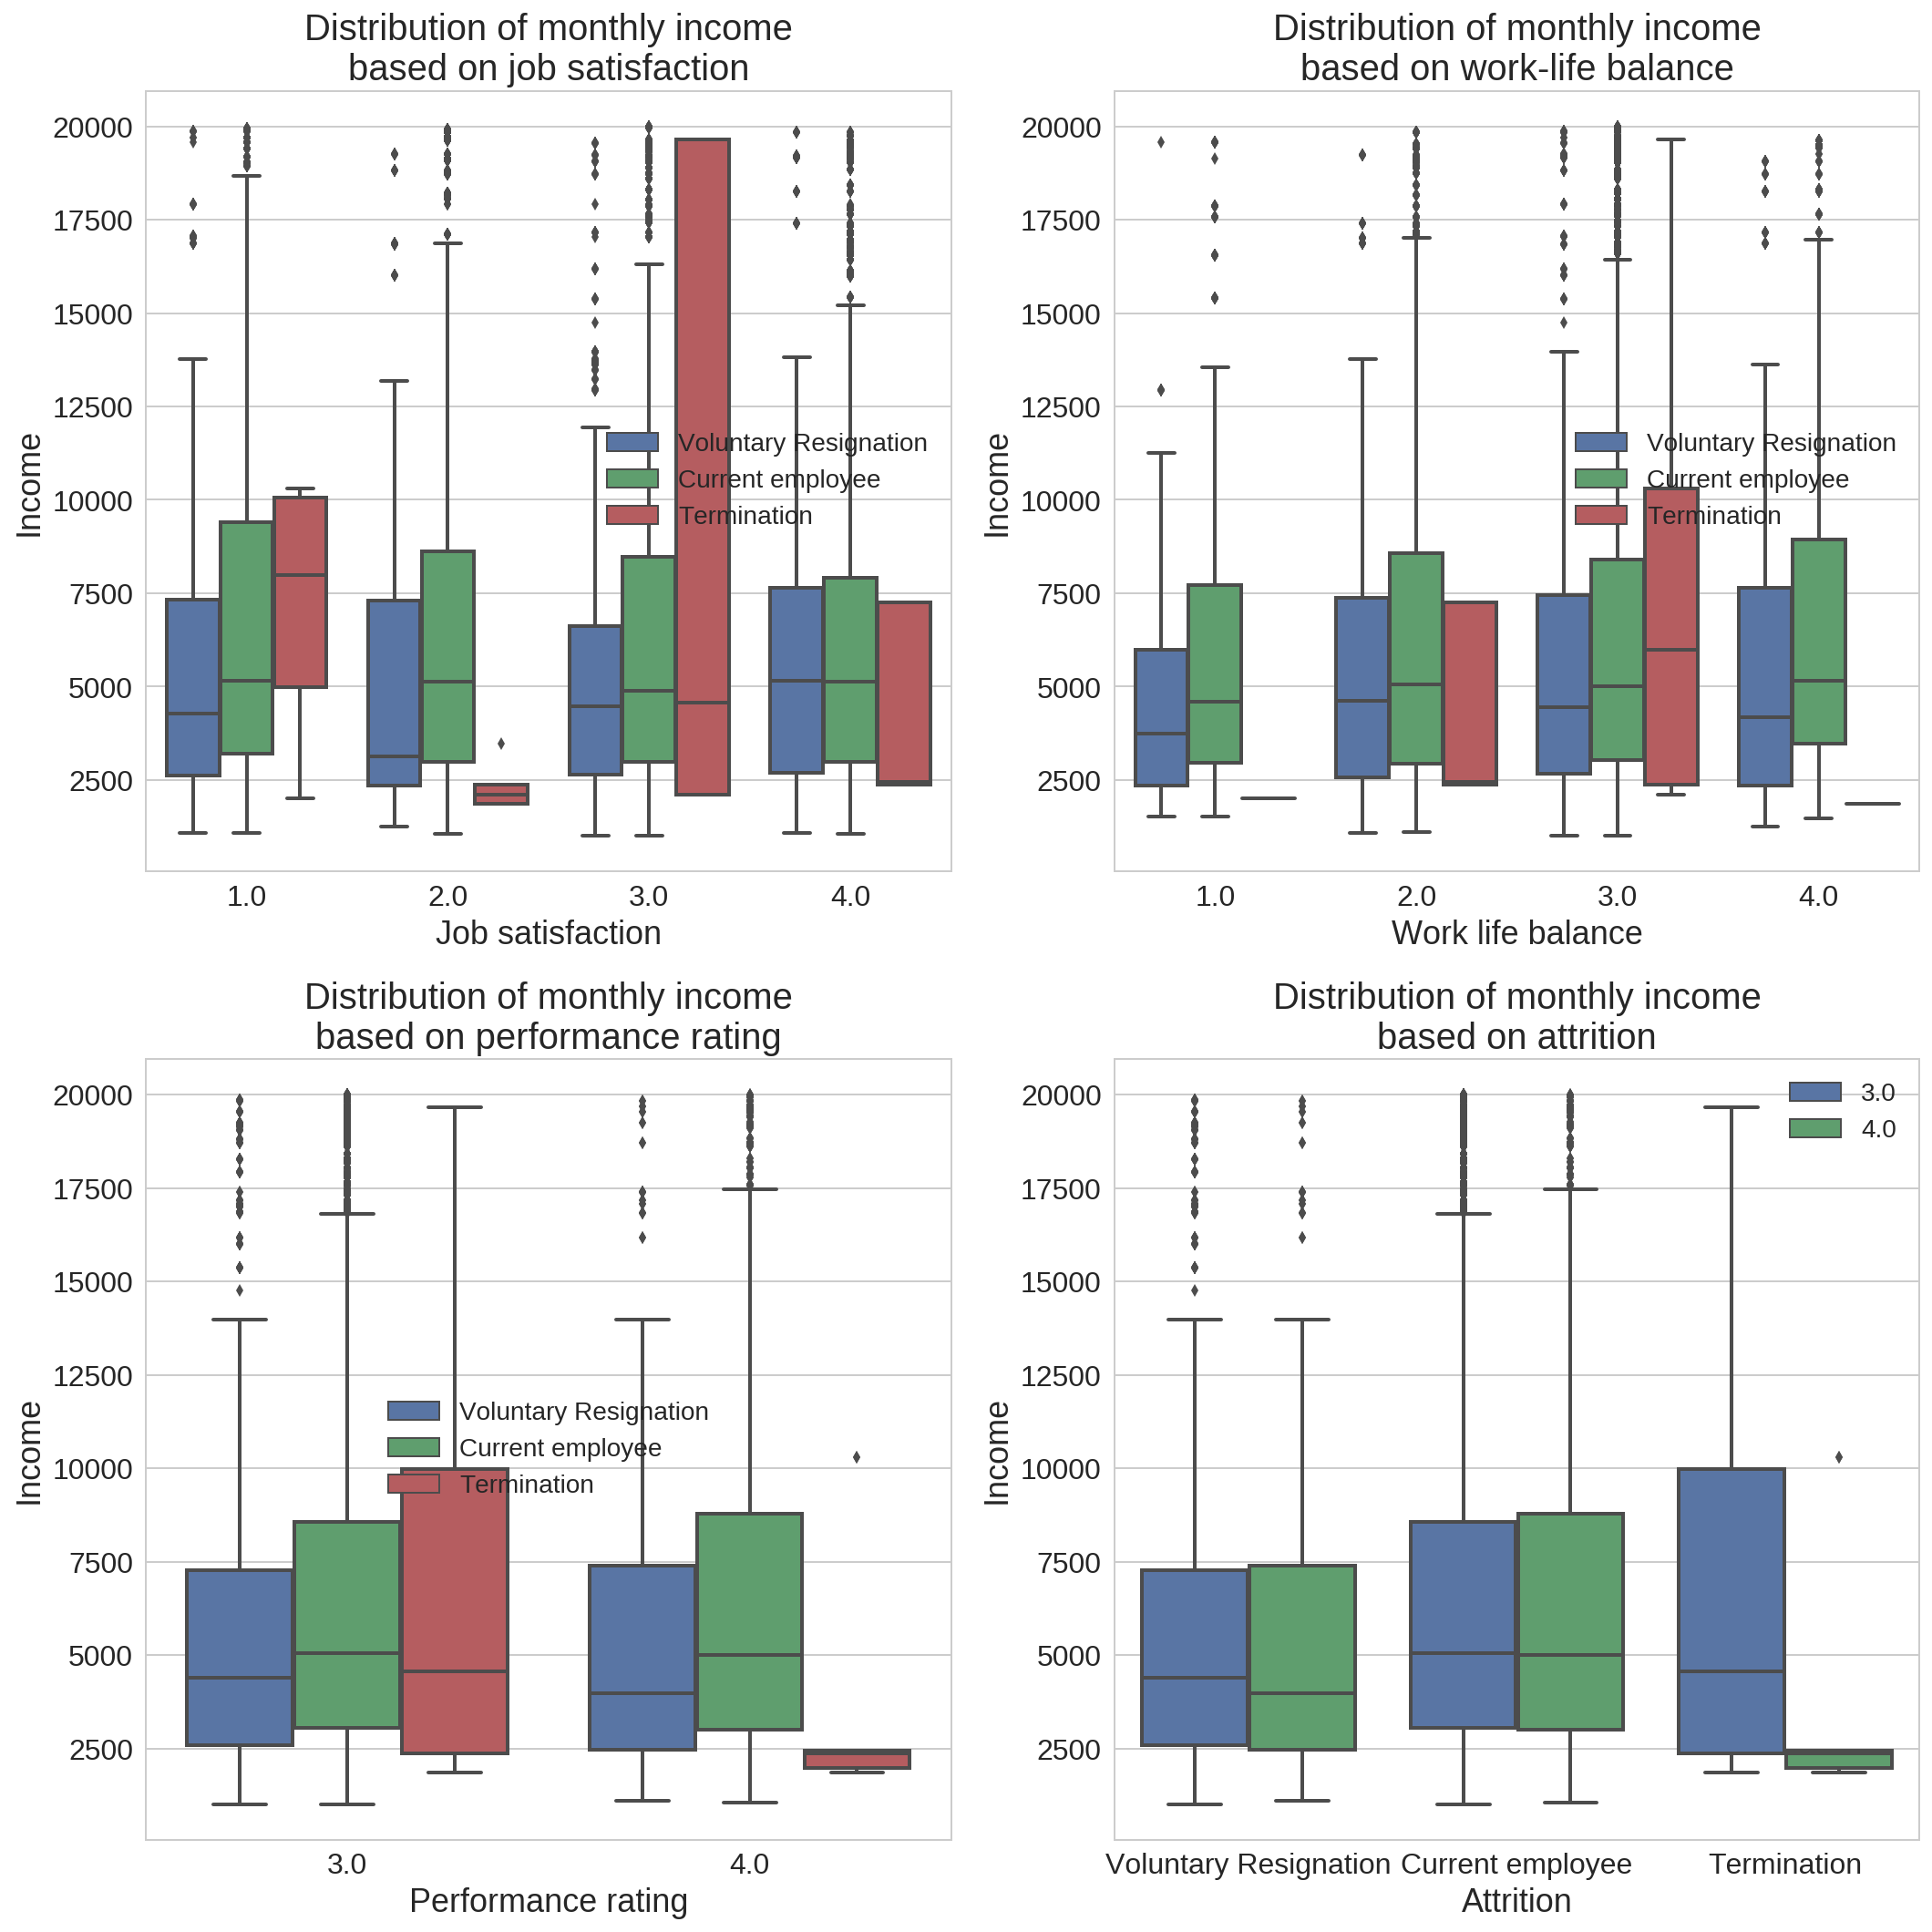

In [32]:
plt.figure(figsize=(15,15))
## Job satisfaction and number of years at company
ax2 = plt.subplot(221)
ax2 = sns.boxplot(x="jobsatisfaction", y="monthlyincome", hue='attrition', data=df)#, estimator=lambda x: len(x) / len(df) * 100)
plt.title('Distribution of monthly income\nbased on job satisfaction',)
plt.legend(loc=0)
ax2.set(ylabel="Income")
plt.xlabel('Job satisfaction');

## Job satisfaction and number of years at company
ax2 = plt.subplot(222)
ax2 = sns.boxplot(x="worklifebalance", y="monthlyincome", hue='attrition', data=df)#, estimator=lambda x: len(x) / len(df) * 100)
plt.title('Distribution of monthly income\nbased on work-life balance',)
plt.legend(loc=0)
ax2.set(ylabel="Income")
plt.xlabel('Work life balance')

ax2 = plt.subplot(223)
ax2 = sns.boxplot(x="performancerating", y="monthlyincome", hue='attrition', data=df)#, estimator=lambda x: len(x) / len(df) * 100)
plt.title('Distribution of monthly income\nbased on performance rating',)
plt.legend(loc=0)
ax2.set(ylabel="Income")
plt.xlabel('Performance rating')

ax2 = plt.subplot(224)
ax2 = sns.boxplot(x="attrition", y="monthlyincome", hue='performancerating', data=df)#, estimator=lambda x: len(x) / len(df) * 100)
plt.title('Distribution of monthly income\nbased on attrition',)
plt.legend(loc=0)
ax2.set(ylabel="Income")
plt.xlabel('Attrition')

plt.tight_layout();

### Job involvement & years

Terminated employees tend to rate job involvement lower than the average employee

Average job involvement rating 
Termination: 2
Current employee: 3
Voluntary resignation: 3


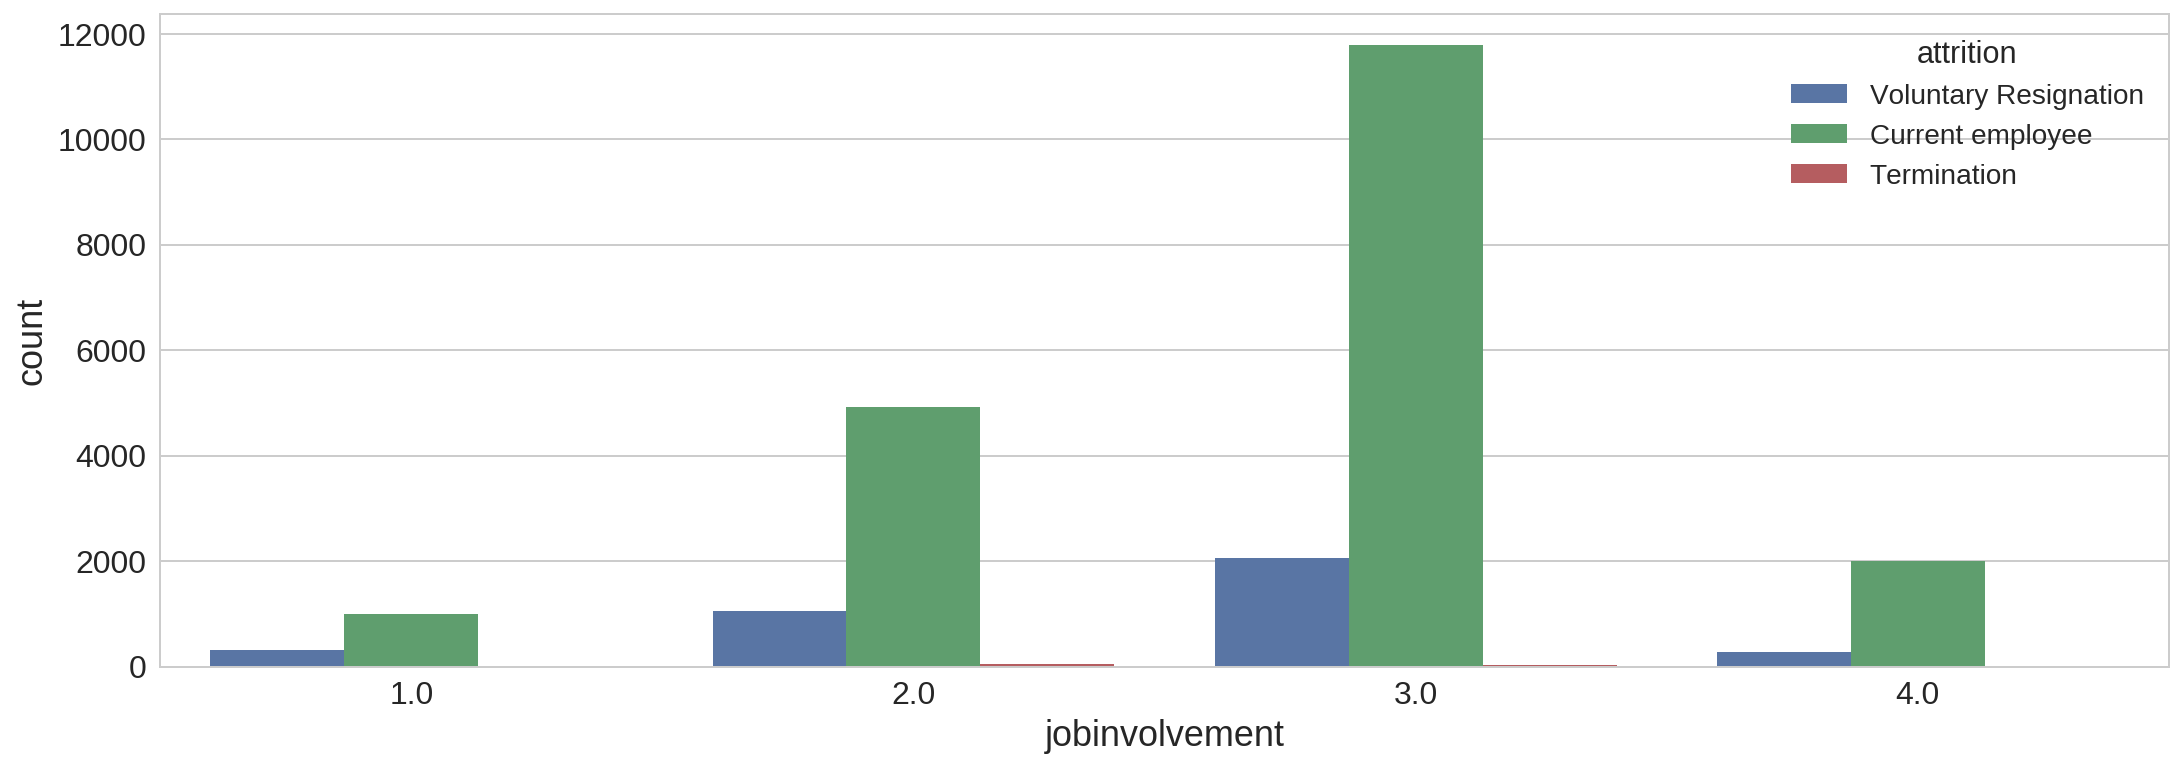

In [33]:

# ax2 = sns.barplot(x="jobinvolvement", hue='attrition', data=df[df['gender']=='Male'])
# plt.title('Female',fontsize=16)
# ax2.set(ylabel="Percent");

# sns.stripplot(y="jobinvolvement",x='attrition', data=df, jitter=True);

sns.countplot(x="jobinvolvement",hue='attrition', data=df)
t = df[df['attrition']=='Termination']['jobinvolvement'].median()
c = df[df['attrition']=='Current employee']['jobinvolvement'].median()
v = df[df['attrition']=='Voluntary Resignation']['jobinvolvement'].median()
print ('Average job involvement rating ')
print ('Termination: {:.0f}\nCurrent employee: {:.0f}\nVoluntary resignation: {:.0f}'.format(t, c, v))

### Work-life balance and retentions

#### Years at company & work-life balance

In [34]:
## Average years at company 
df['yearsatcompany'].median(),df['yearsatcompany'].mean(), df['yearsatcompany'].min(), df['yearsatcompany'].max()

(5.0, 7.0057400399676855, 0.0, 40.0)

Terminated employees with low job satisfaction tend to work more years at the company than the average employee. Low satisfied employees who have been terminated worked 10 years, on average while the average employee tends to work at the company for 5 years. 

Employees who low work-life balance tend to voluntarily resign sooner than employees with high work-life balance.

In [253]:
df[df['worklifebalance']==1].groupby('attrition').count()

age  businesstravel  dailyrate  department  \
attrition                                                            
Current employee       1014            1014       1014        1014   
Termination               8               8          8           8   
Voluntary Resignation   254             254        254         254   

                       distancefromhome  education  educationfield  \
attrition                                                            
Current employee                   1013       1014             901   
Termination                           8          8               8   
Voluntary Resignation               254        254             229   

                       employeecount  employeenumber  application_id  \
attrition                                                              
Current employee                1014            1014            1014   
Termination                        8               8               8   
Voluntary Resignation            254             254             254   

                               ...           department_code  education_code  \
attrition                      ...                                             
Current employee               ...                      1014            1014   
Termination                    ...                         8               8   
Voluntary Resignation          ...                       254             254   

                       educationfield_code  environmentsatisfaction_code  \
attrition                                                                  
Current employee                      1014                          1014   
Termination                              8                             8   
Voluntary Resignation                  254                           254   

                       gender_code  jobrole_code  maritalstatus_code  \
attrition                                                              
Current employee              1014          1014                1014   
Termination                      8             8                   8   
Voluntary Resignation          254           254                 254   

                       over18_code  overtime_code  employee_source_code  
attrition                                                                
Current employee              1014           1014                  1014  
Termination                      8              8                     8  
Voluntary Resignation          254            254                   254  

[3 rows x 48 columns]

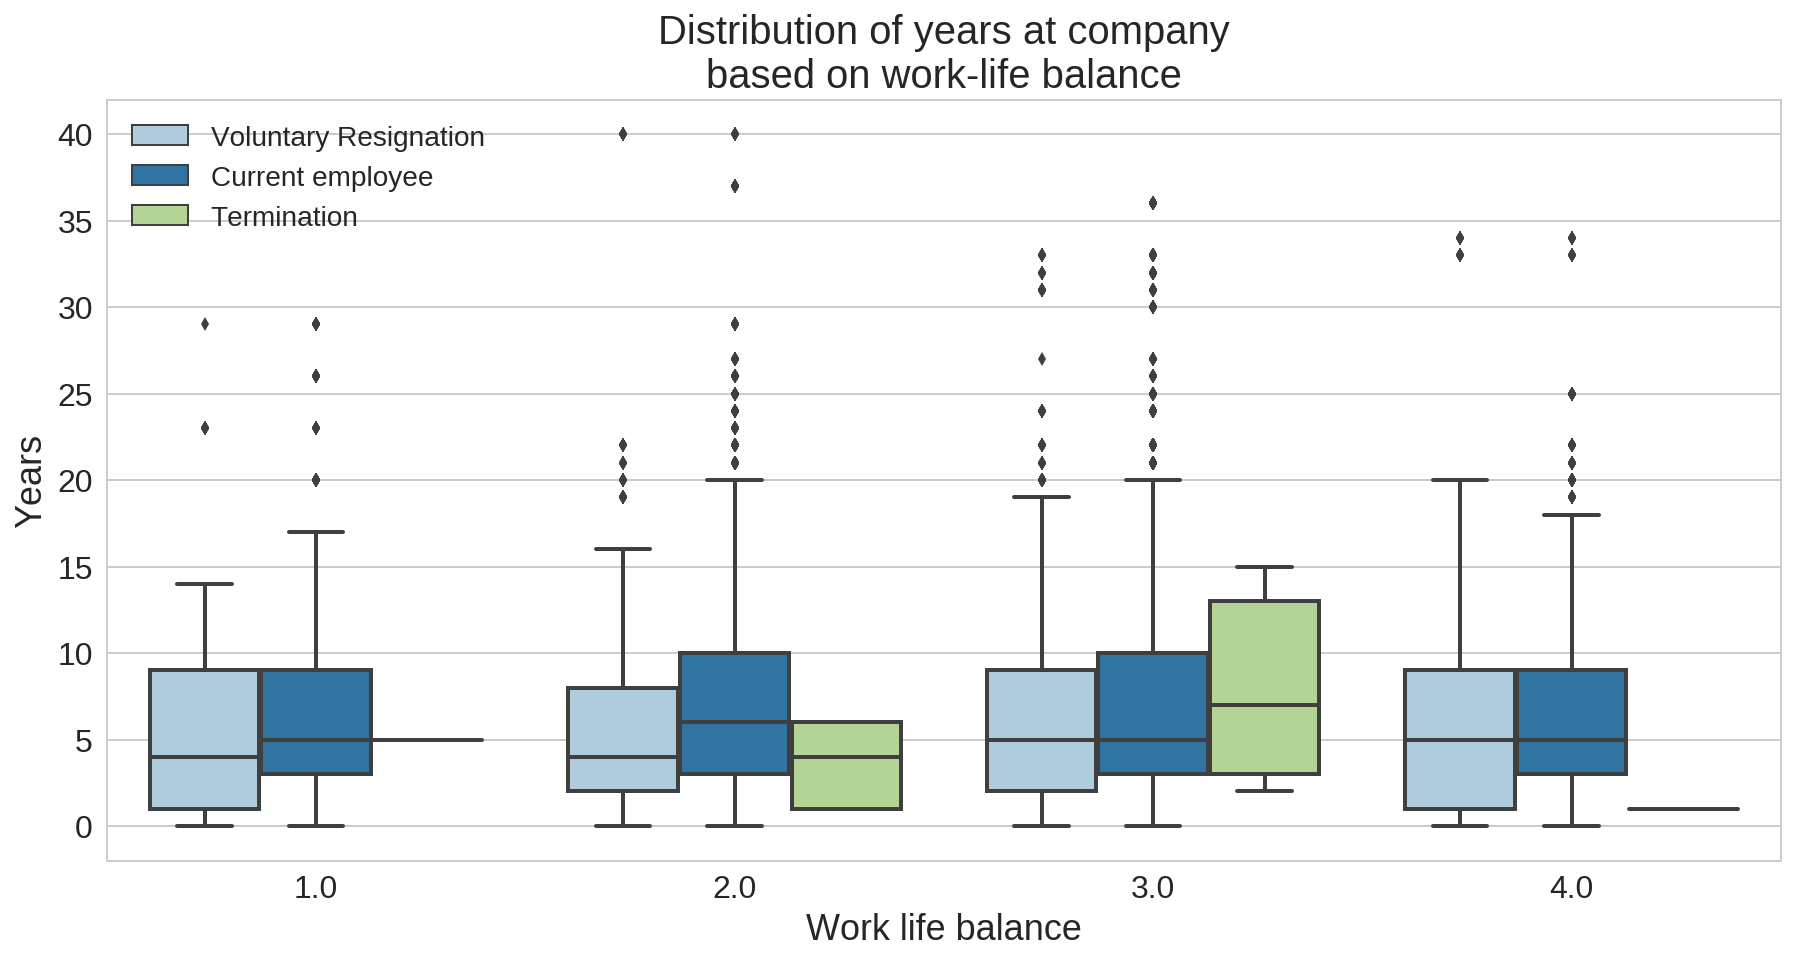

In [255]:
plt.figure(figsize=(15,7))

## Job satisfaction and number of years at company
ax2 = plt.subplot(111)
ax2 = sns.boxplot(x="worklifebalance", y="yearsatcompany", hue='attrition', data=df, palette='Paired')#, estimator=lambda x: len(x) / len(df) * 100)
plt.title('Distribution of years at company\nbased on work-life balance',)
plt.legend(loc=0)
ax2.set(ylabel="Years")
plt.xlabel('Work life balance');

#### Gender differences

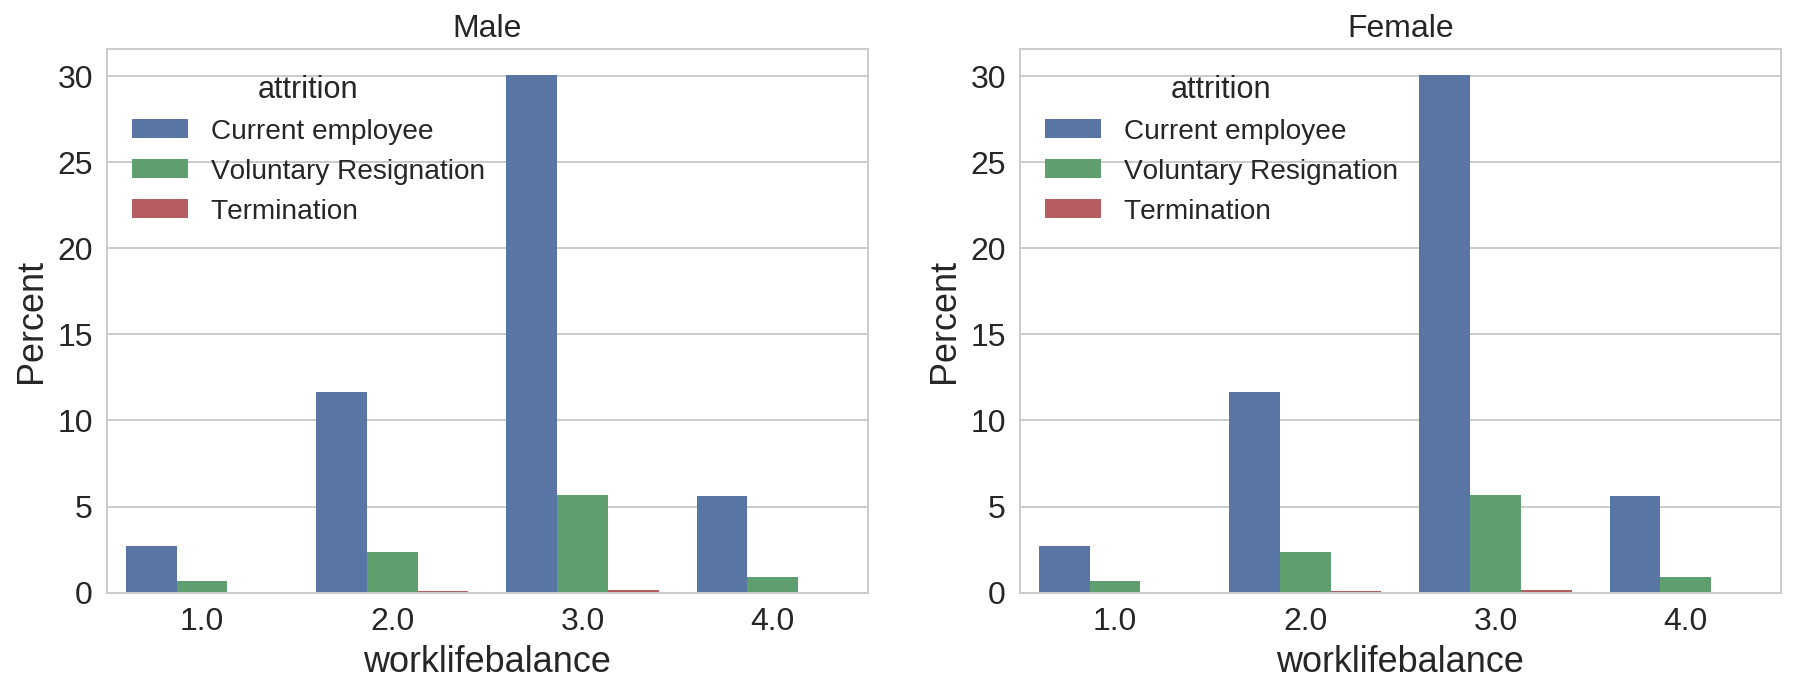

In [36]:
plt.figure(figsize=(15,5))
plt.subplot(121)
ax1 = sns.barplot(x="worklifebalance", y="worklifebalance", hue='attrition', data=df[df['gender']=='Male'], estimator=lambda x: len(x) / len(df) * 100)
plt.title('Male',fontsize=16)
ax1.set(ylabel="Percent")
plt.subplot(122)
ax2 = sns.barplot(x="worklifebalance", y="worklifebalance", hue='attrition', data=df[df['gender']=='Male'], estimator=lambda x: len(x) / len(df) * 100)
plt.title('Female',fontsize=16)
ax2.set(ylabel="Percent");

#### Work-life balance and job satisfaction relationship

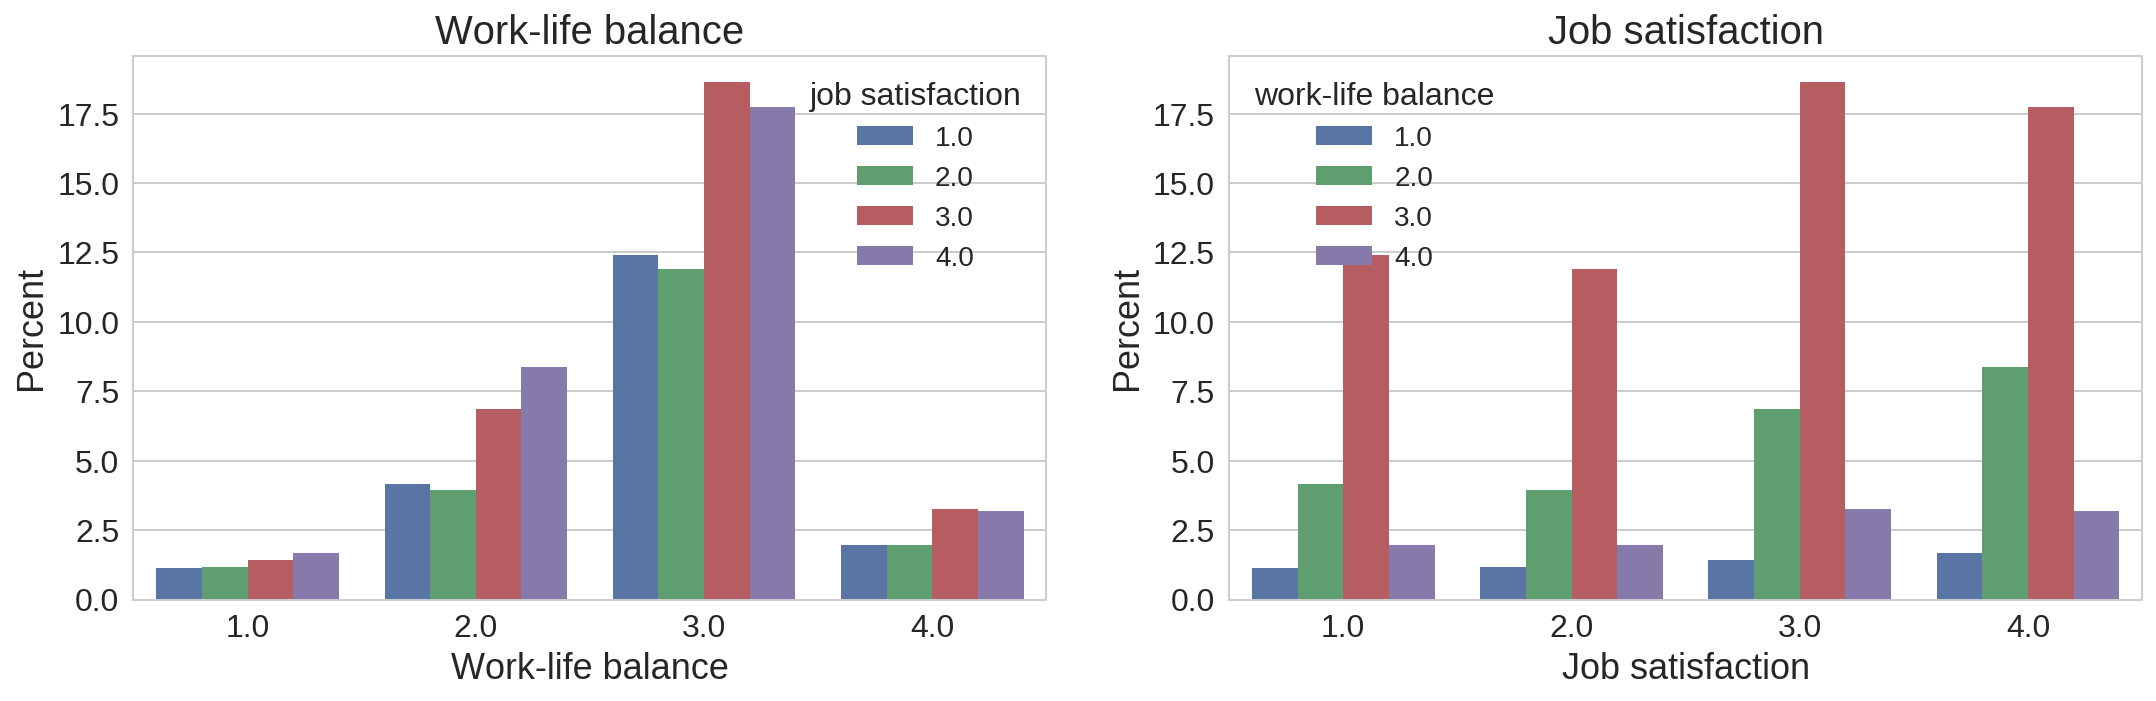

In [37]:
plt.figure(figsize=(18,5))
plt.subplot(121)
ax1 = sns.barplot(x="worklifebalance", y="worklifebalance", hue='jobsatisfaction', data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.title('Work-life balance')
ax1.set(ylabel="Percent")
plt.xlabel('Work-life balance')
plt.legend(title='job satisfaction')

plt.subplot(122)
ax1 = sns.barplot(x="jobsatisfaction", y="jobsatisfaction", hue='worklifebalance', data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.title('Job satisfaction')
ax1.set(ylabel="Percent")
plt.xlabel('Job satisfaction')
plt.legend(title='work-life balance',loc=2);

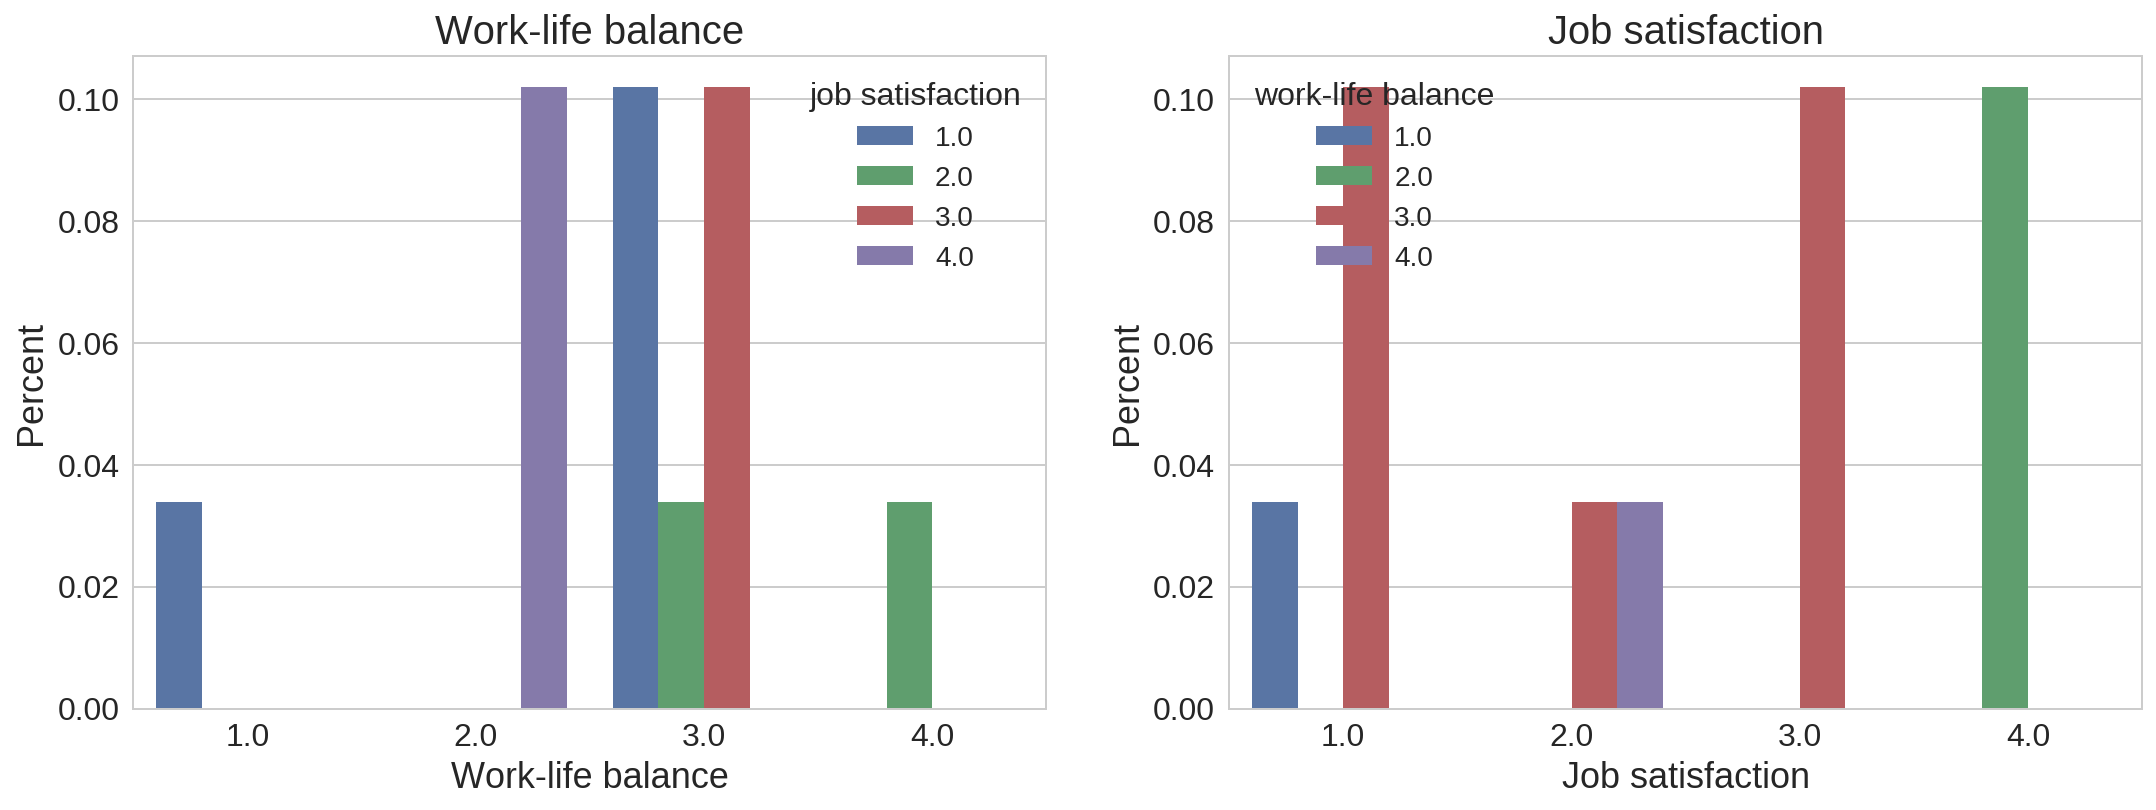

In [38]:
plt.subplot(122)
ax1 = sns.barplot(x="jobsatisfaction", y="jobsatisfaction", hue='worklifebalance', data=df[df['attrition']=='Termination'], estimator=lambda x: len(x) / len(df) * 100)
plt.title('Job satisfaction')
ax1.set(ylabel="Percent")
plt.xlabel('Job satisfaction')
plt.legend(title='work-life balance',loc=2);

plt.subplot(121)
ax1 = sns.barplot(x="worklifebalance", y="worklifebalance", hue='jobsatisfaction', data=df[df['attrition']=='Termination'], estimator=lambda x: len(x) / len(df) * 100)
plt.title('Work-life balance')
ax1.set(ylabel="Percent")
plt.xlabel('Work-life balance')
plt.legend(title='job satisfaction')

#### Work life balance based on number of years at company split by attrition 

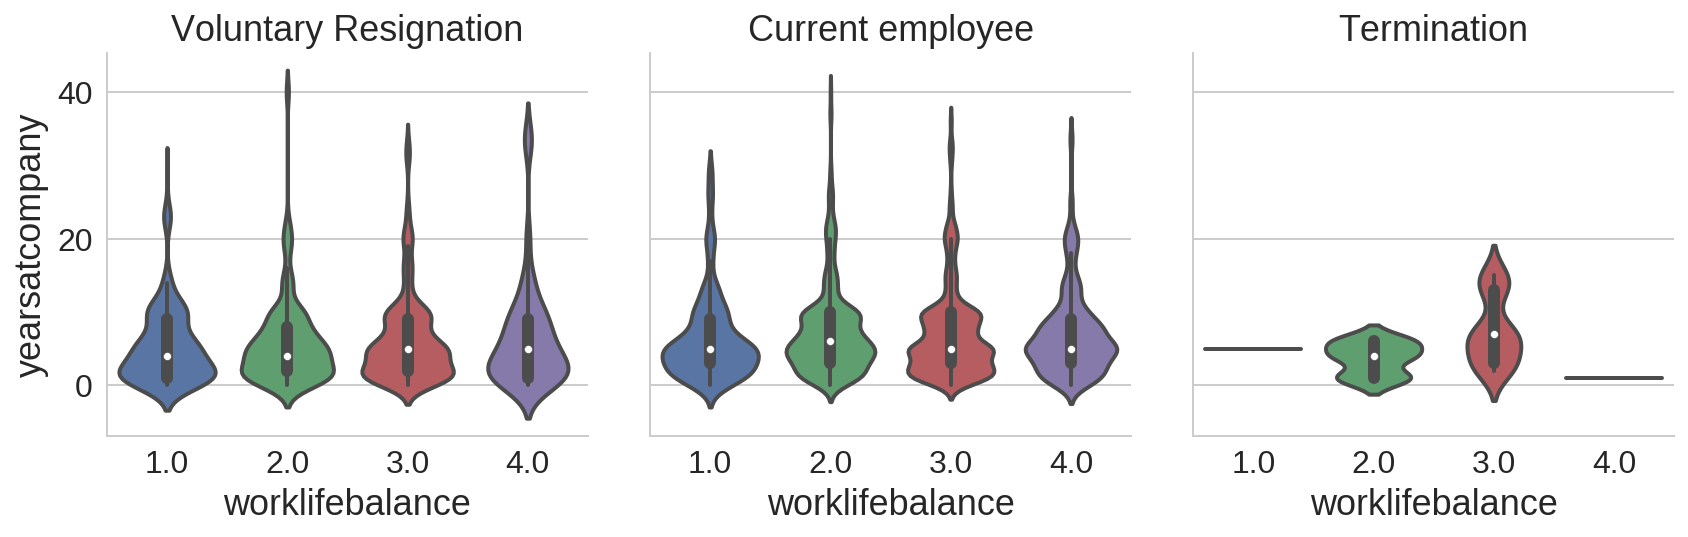

In [39]:
sns.factorplot(x="worklifebalance", y="yearsatcompany",
               col="attrition", data=df, kind="violin", size=4, aspect=1).set_titles("{col_name}");

#### Work life balance based on number of years since promotion split by attrition 

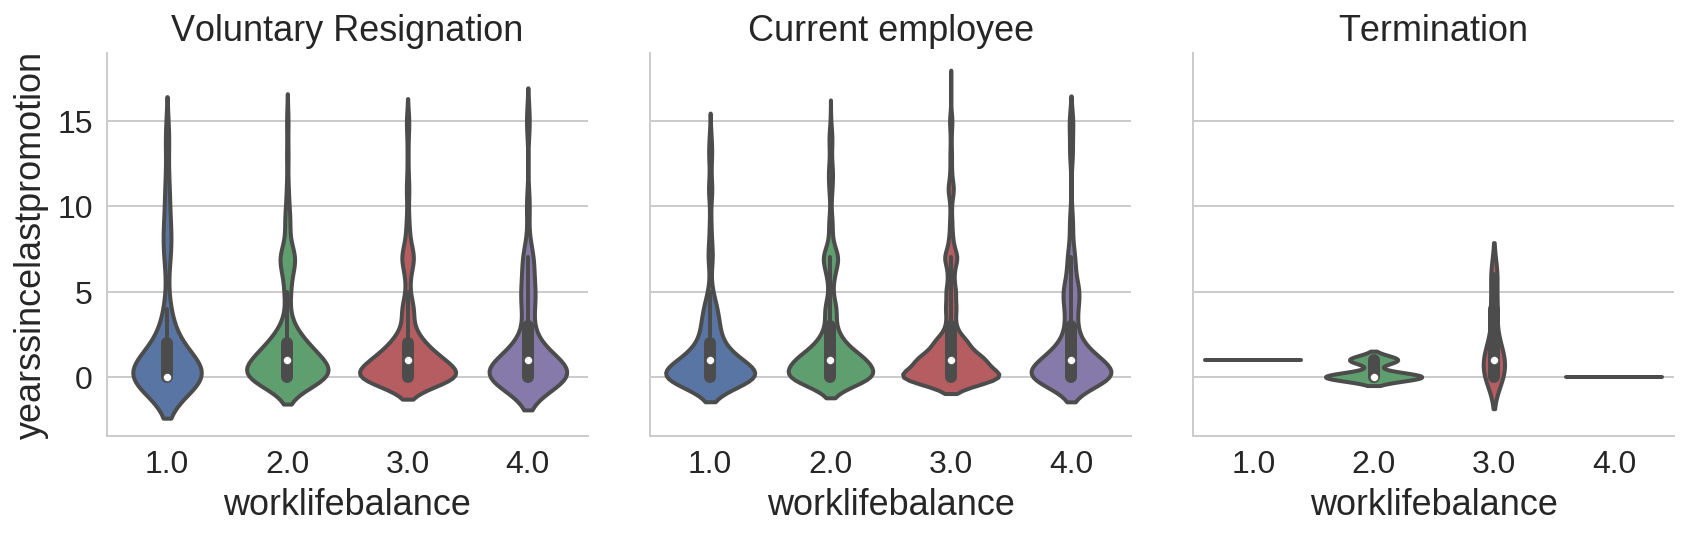

In [40]:
sns.factorplot(x="worklifebalance", y="yearssincelastpromotion",
               col="attrition", data=df, kind="violin", size=4, aspect=1).set_titles("{col_name}");

#### Work life balance based on distance from home split by attrition 

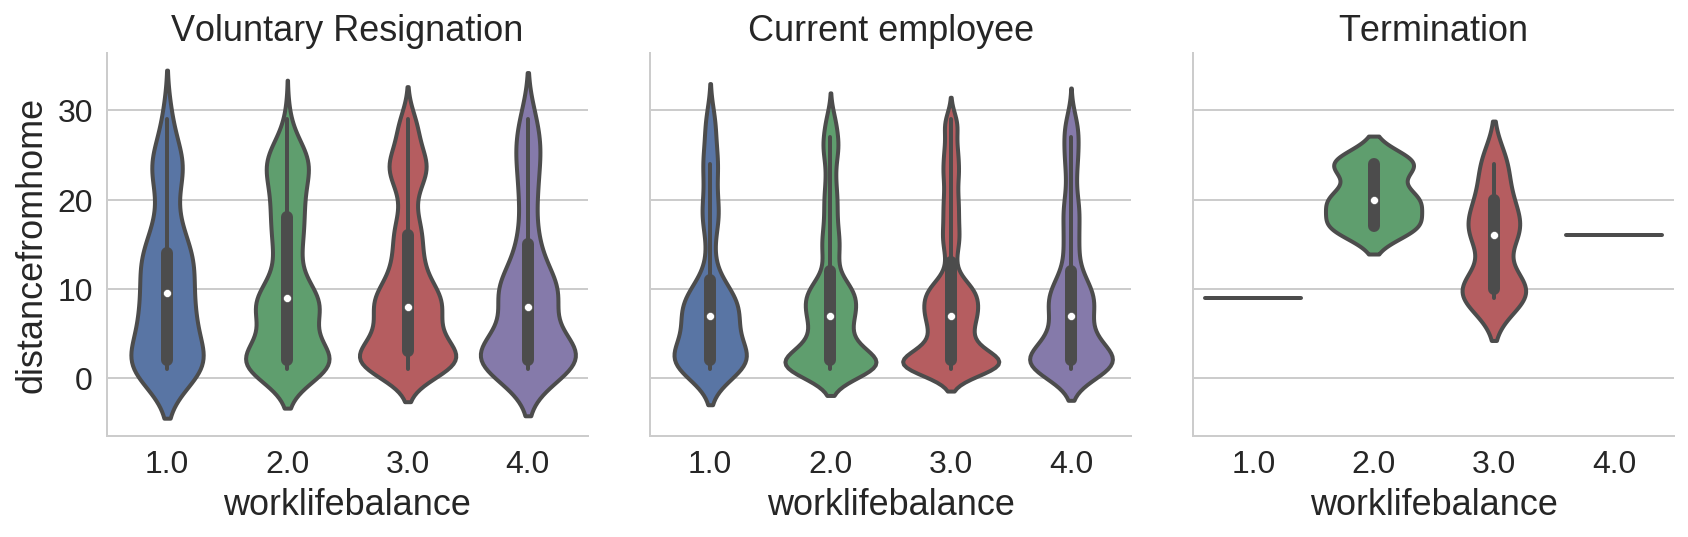

In [41]:

sns.factorplot(x="worklifebalance", y="distancefromhome",
               col="attrition", data=df, kind="violin", size=4, aspect=1).set_titles("{col_name}");

#### Work life balance based on education split by attrition 

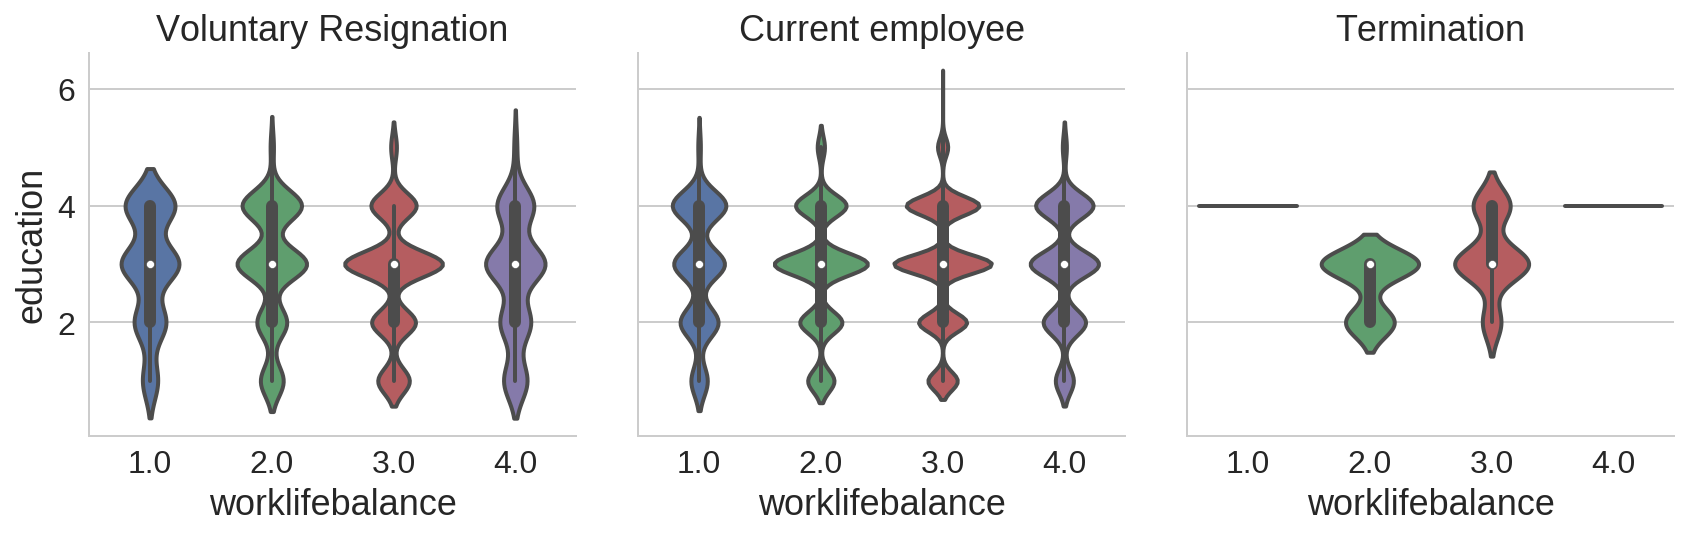

In [42]:
sns.factorplot(x="worklifebalance", y="education",
               col="attrition", data=df, kind="violin", size=4, aspect=1).set_titles("{col_name}");

#### Work life balance based total working years split by attrition 

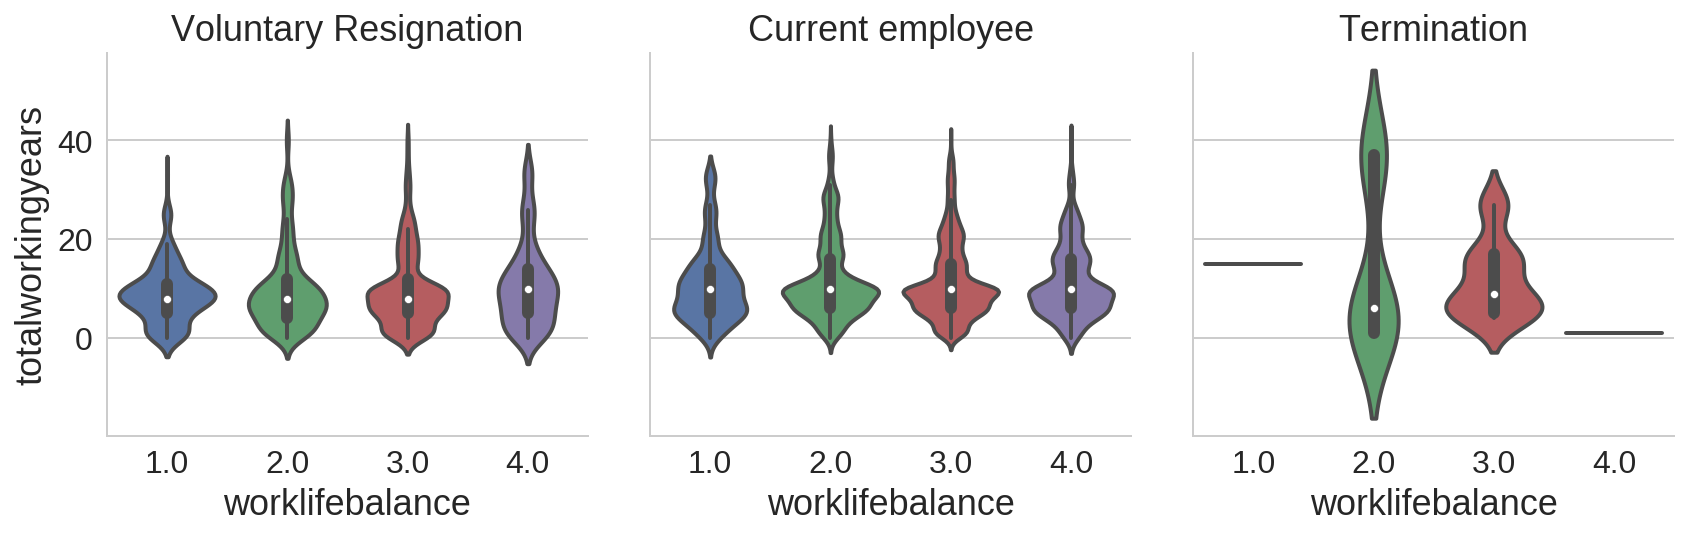

In [43]:
sns.factorplot(x="worklifebalance", y="totalworkingyears",
               col="attrition", data=df, kind="violin", size=4, aspect=1).set_titles("{col_name}");

#### Work life balance based on total working years split by attrition 

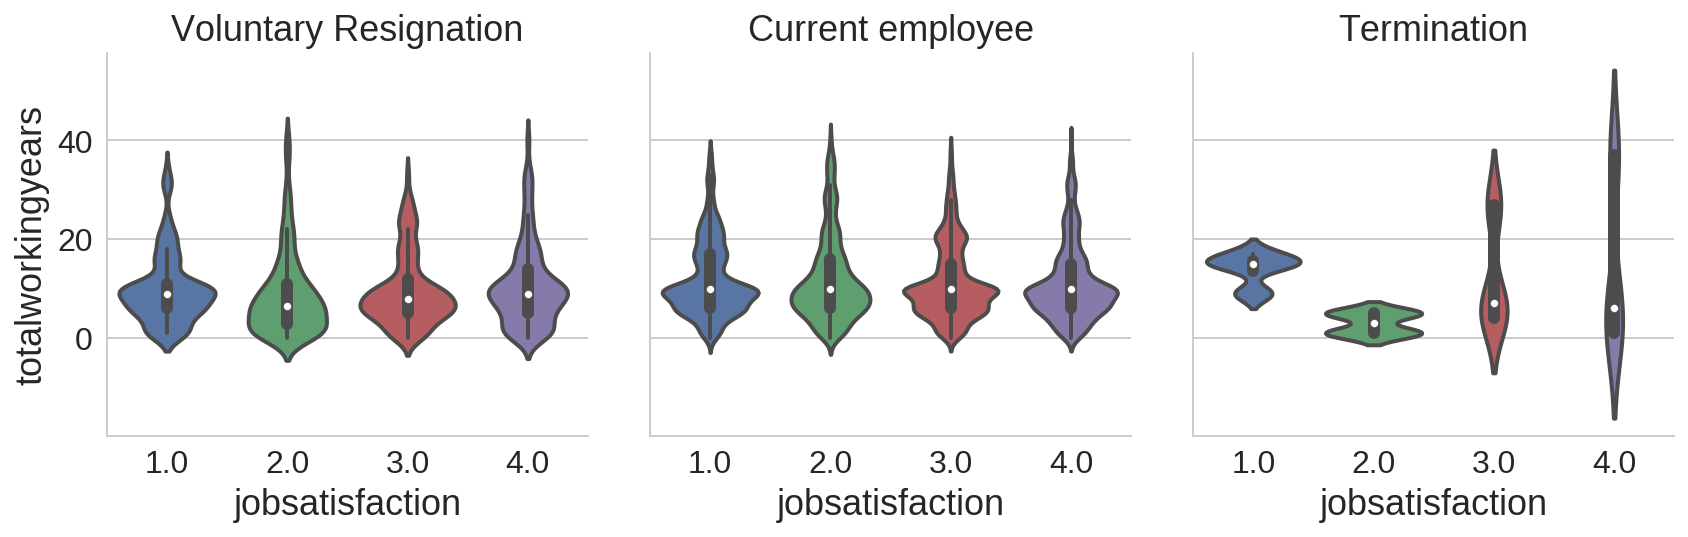

In [44]:
sns.factorplot(x="jobsatisfaction", y="totalworkingyears",
               col="attrition", data=df, kind="violin", size=4, aspect=1).set_titles("{col_name}");

#### Distribtion of age based on gender and attrition

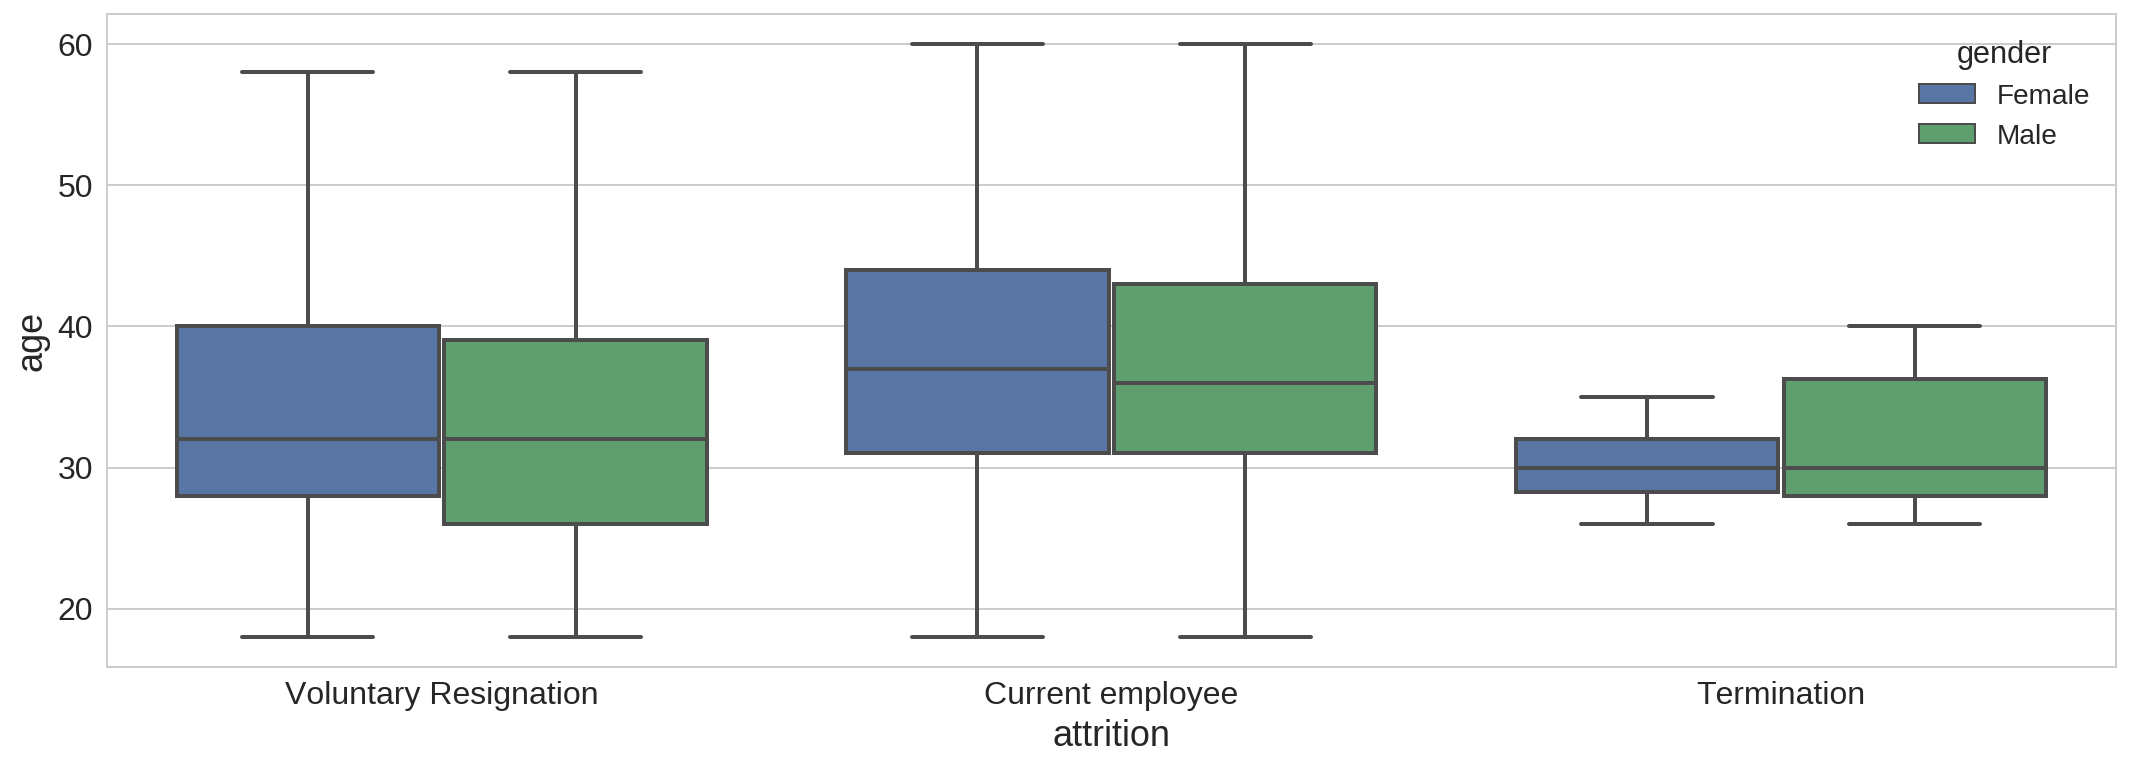

In [45]:
sns.boxplot(x="attrition", y="age", hue="gender", data=df);

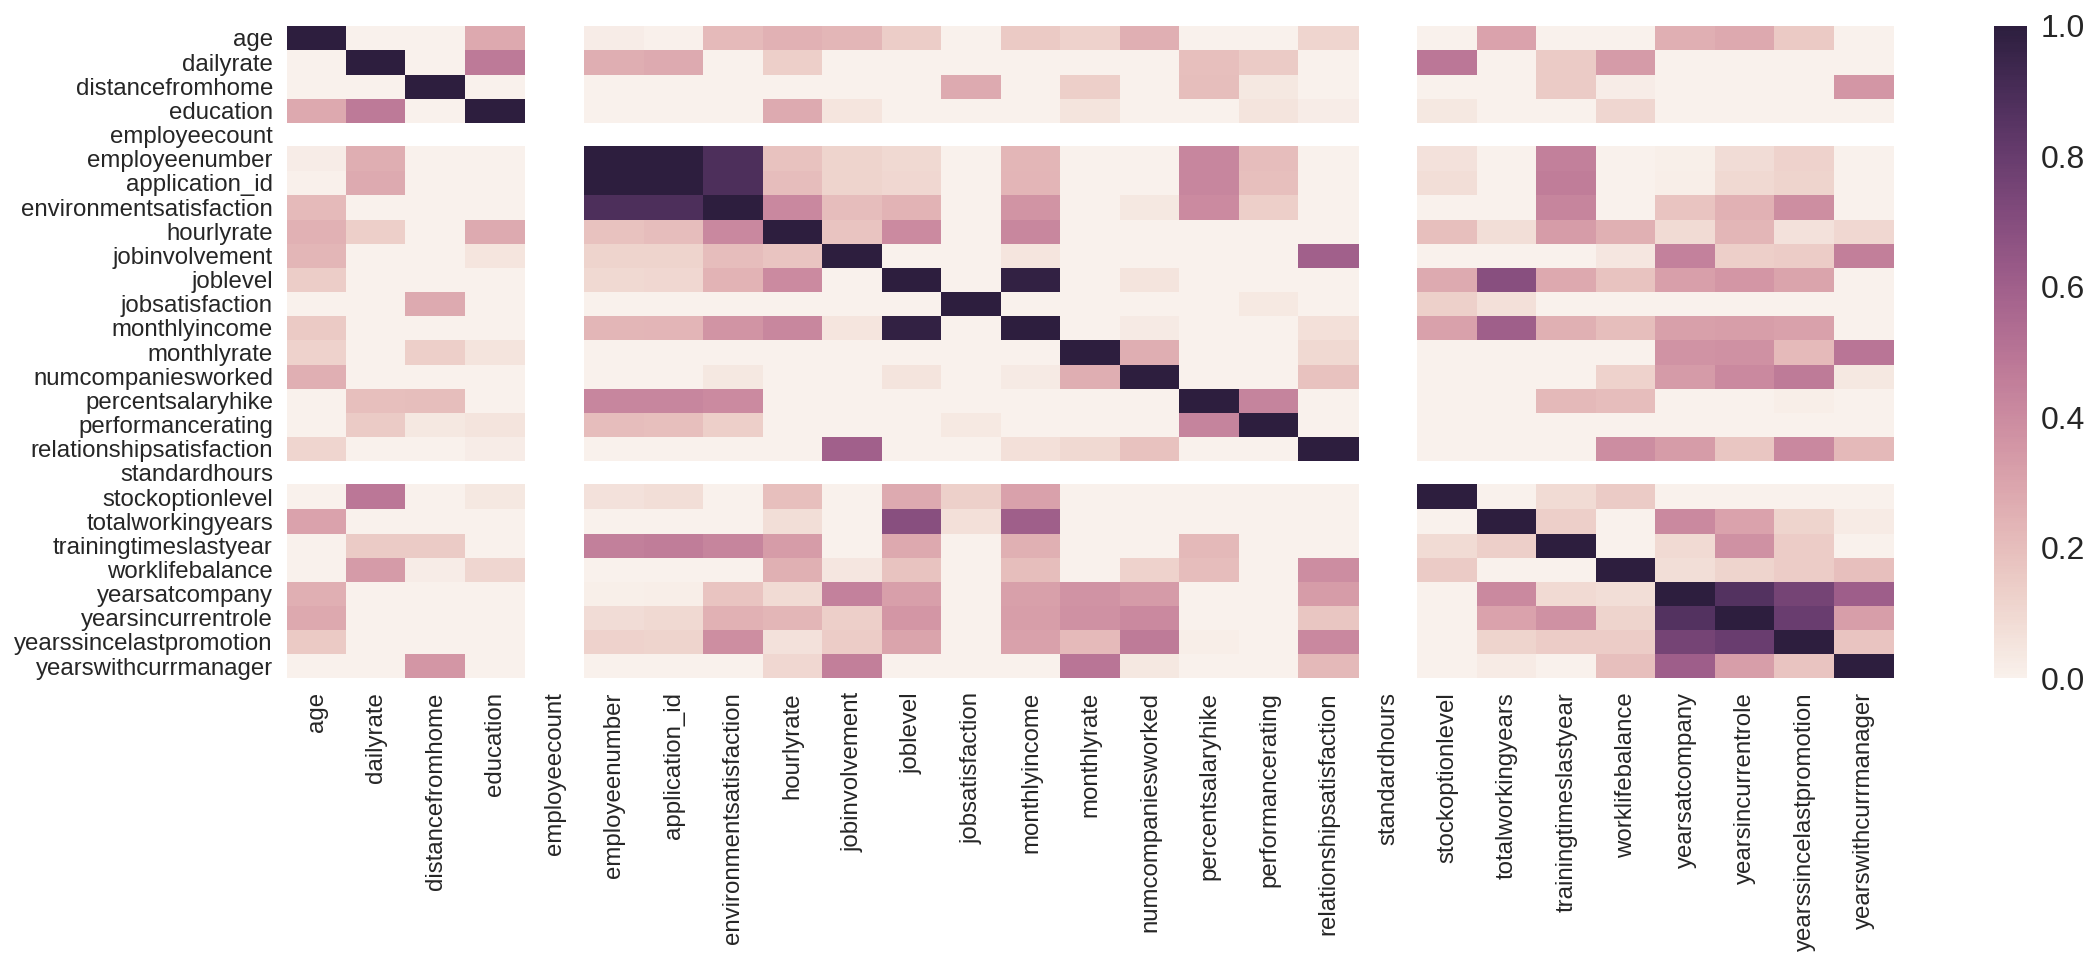

In [46]:
## COrrelation matrix for different attrition groups and different age groups
cor = df[df['attrition']=='Termination'].iloc[:,:-12].corr()
sns.heatmap(cor, vmin=0, vmax=1)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);


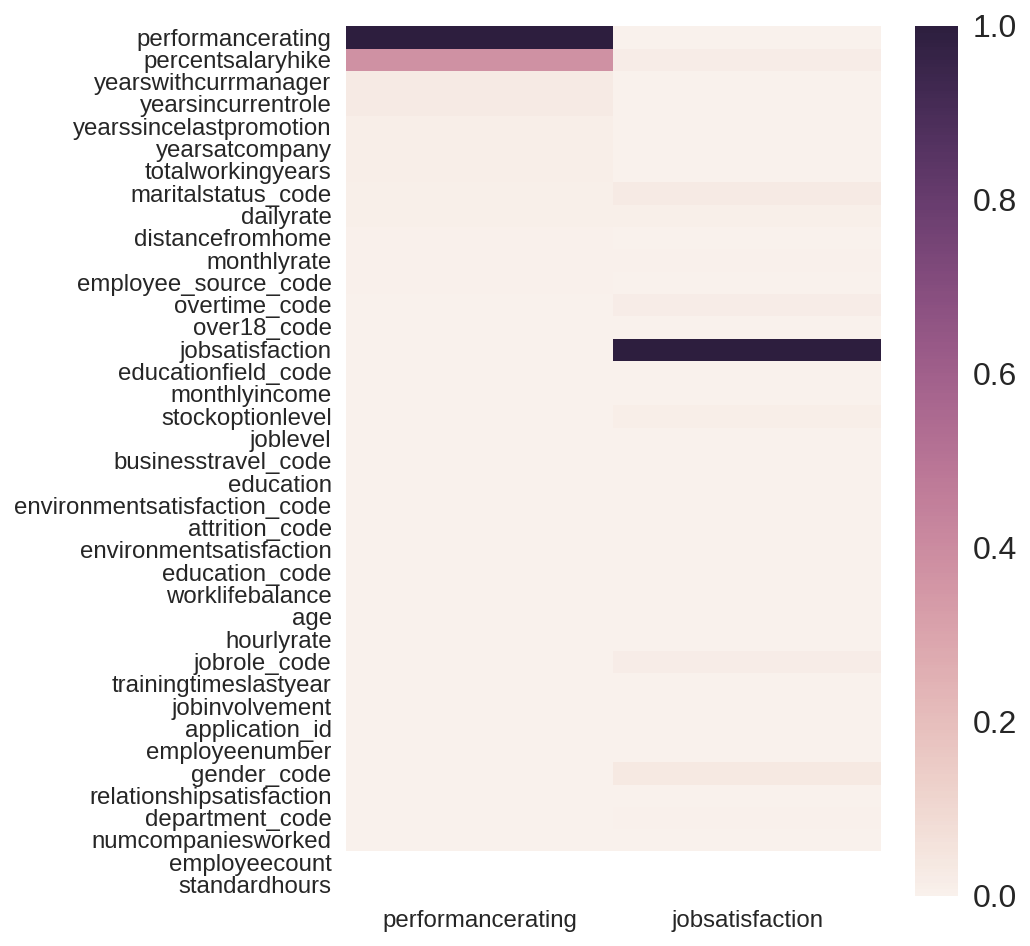

In [47]:
## Variables correlated with Performance rating
cor = df.corr()[['performancerating','jobsatisfaction']].sort_values('performancerating',ascending=False)#.iloc[1:10]
plt.subplots(figsize=(6,8))
sns.heatmap(cor, vmin=0, vmax=1)
plt.yticks(fontsize=12)
plt.xticks(fontsize=12);

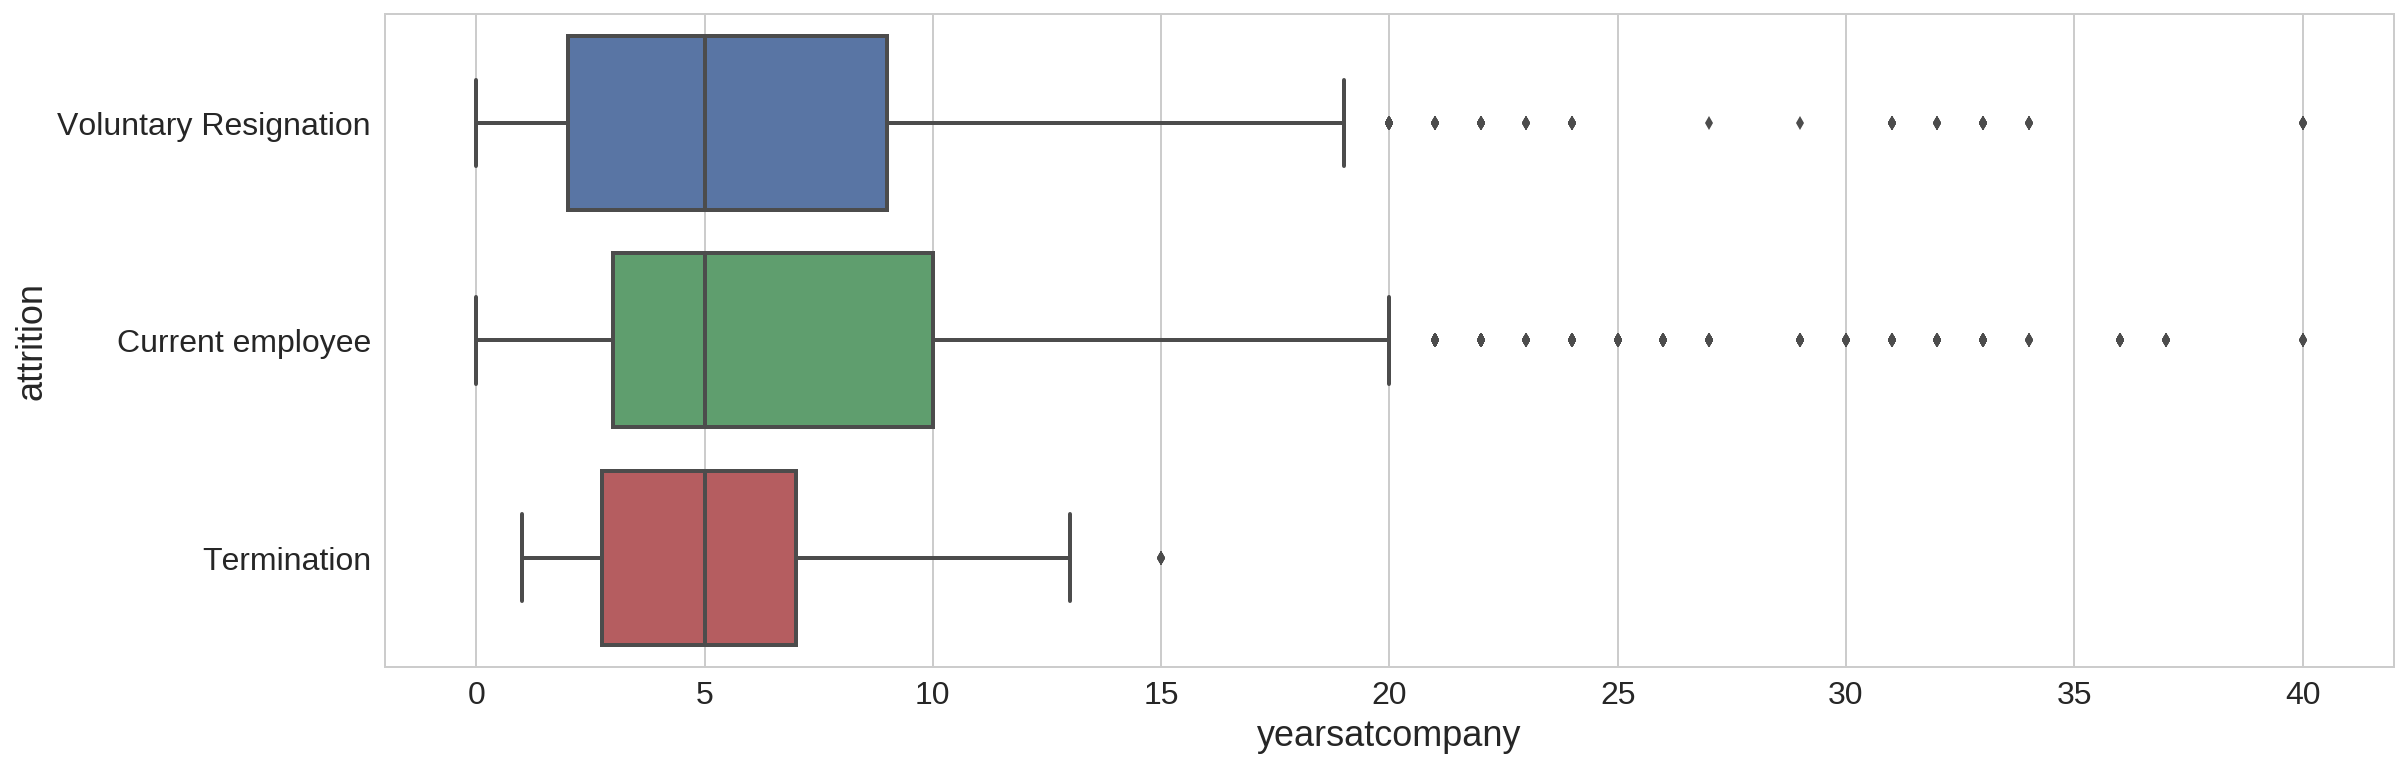

In [48]:
sns.boxplot('yearsatcompany','attrition',data=df);

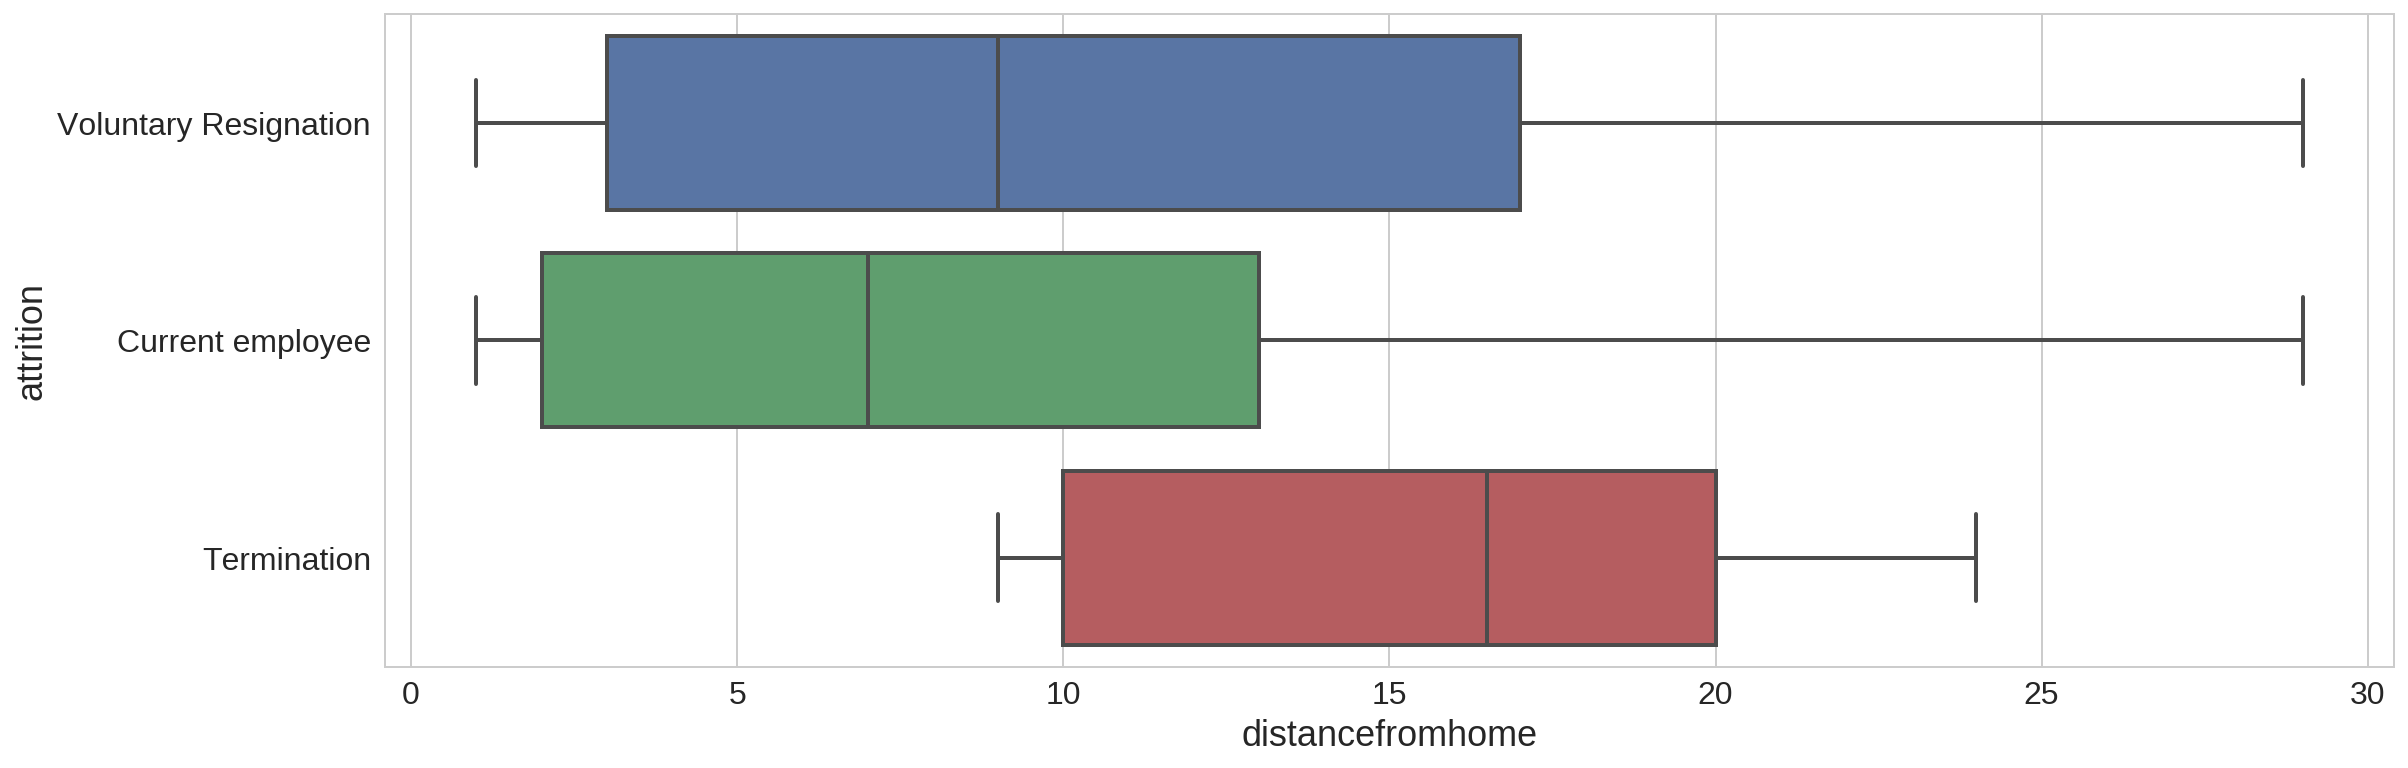

In [49]:
sns.boxplot('distancefromhome','attrition',data=df);

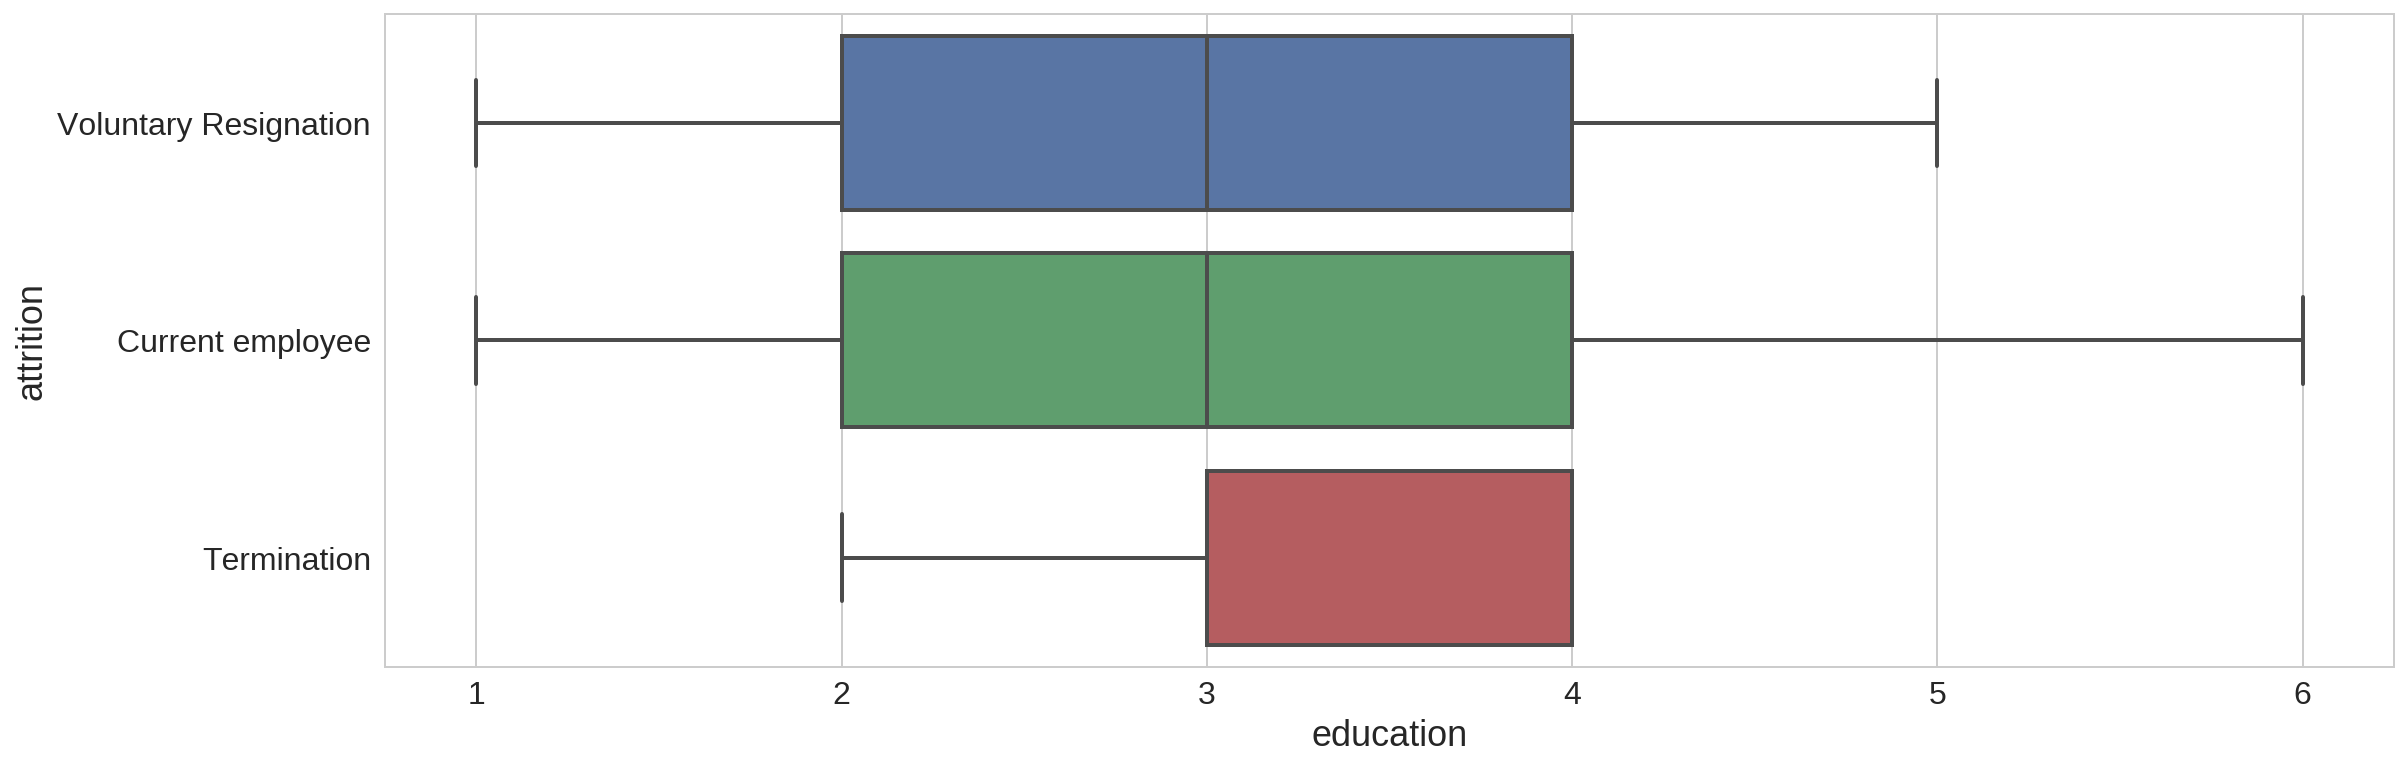

In [50]:
sns.boxplot('education','attrition',data=df);

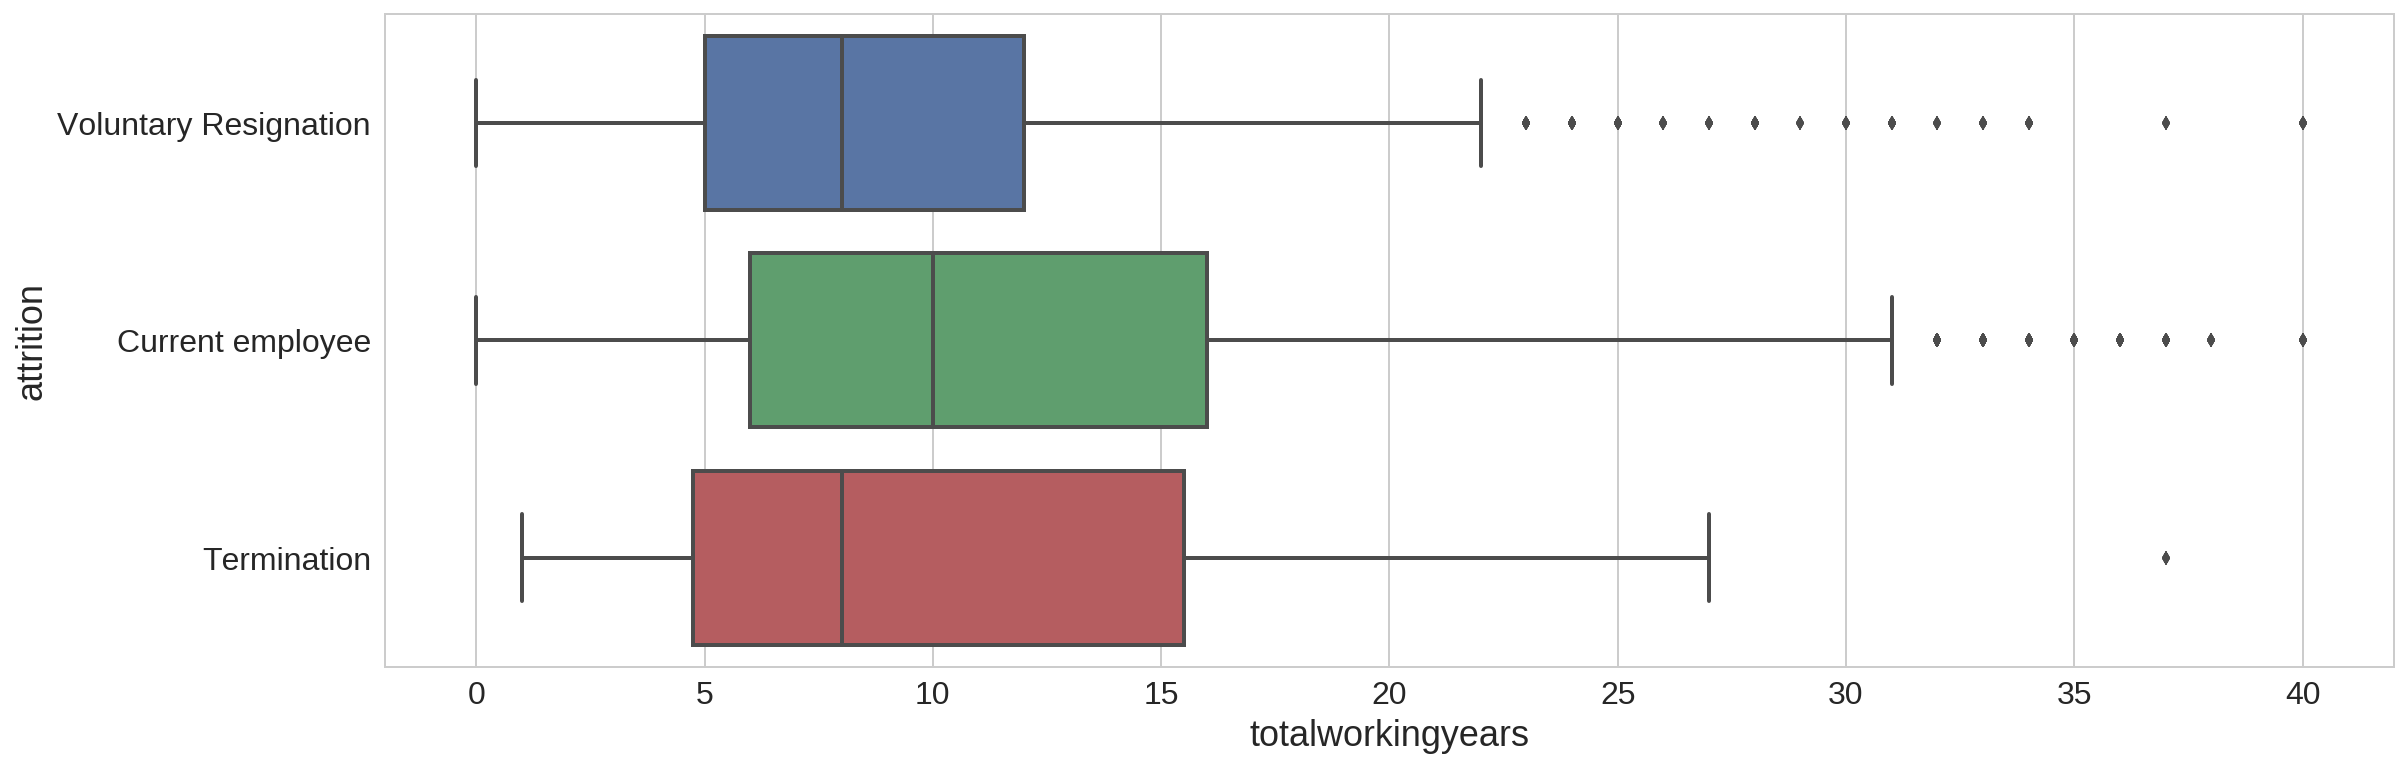

In [51]:
sns.boxplot('totalworkingyears','attrition',data=df);

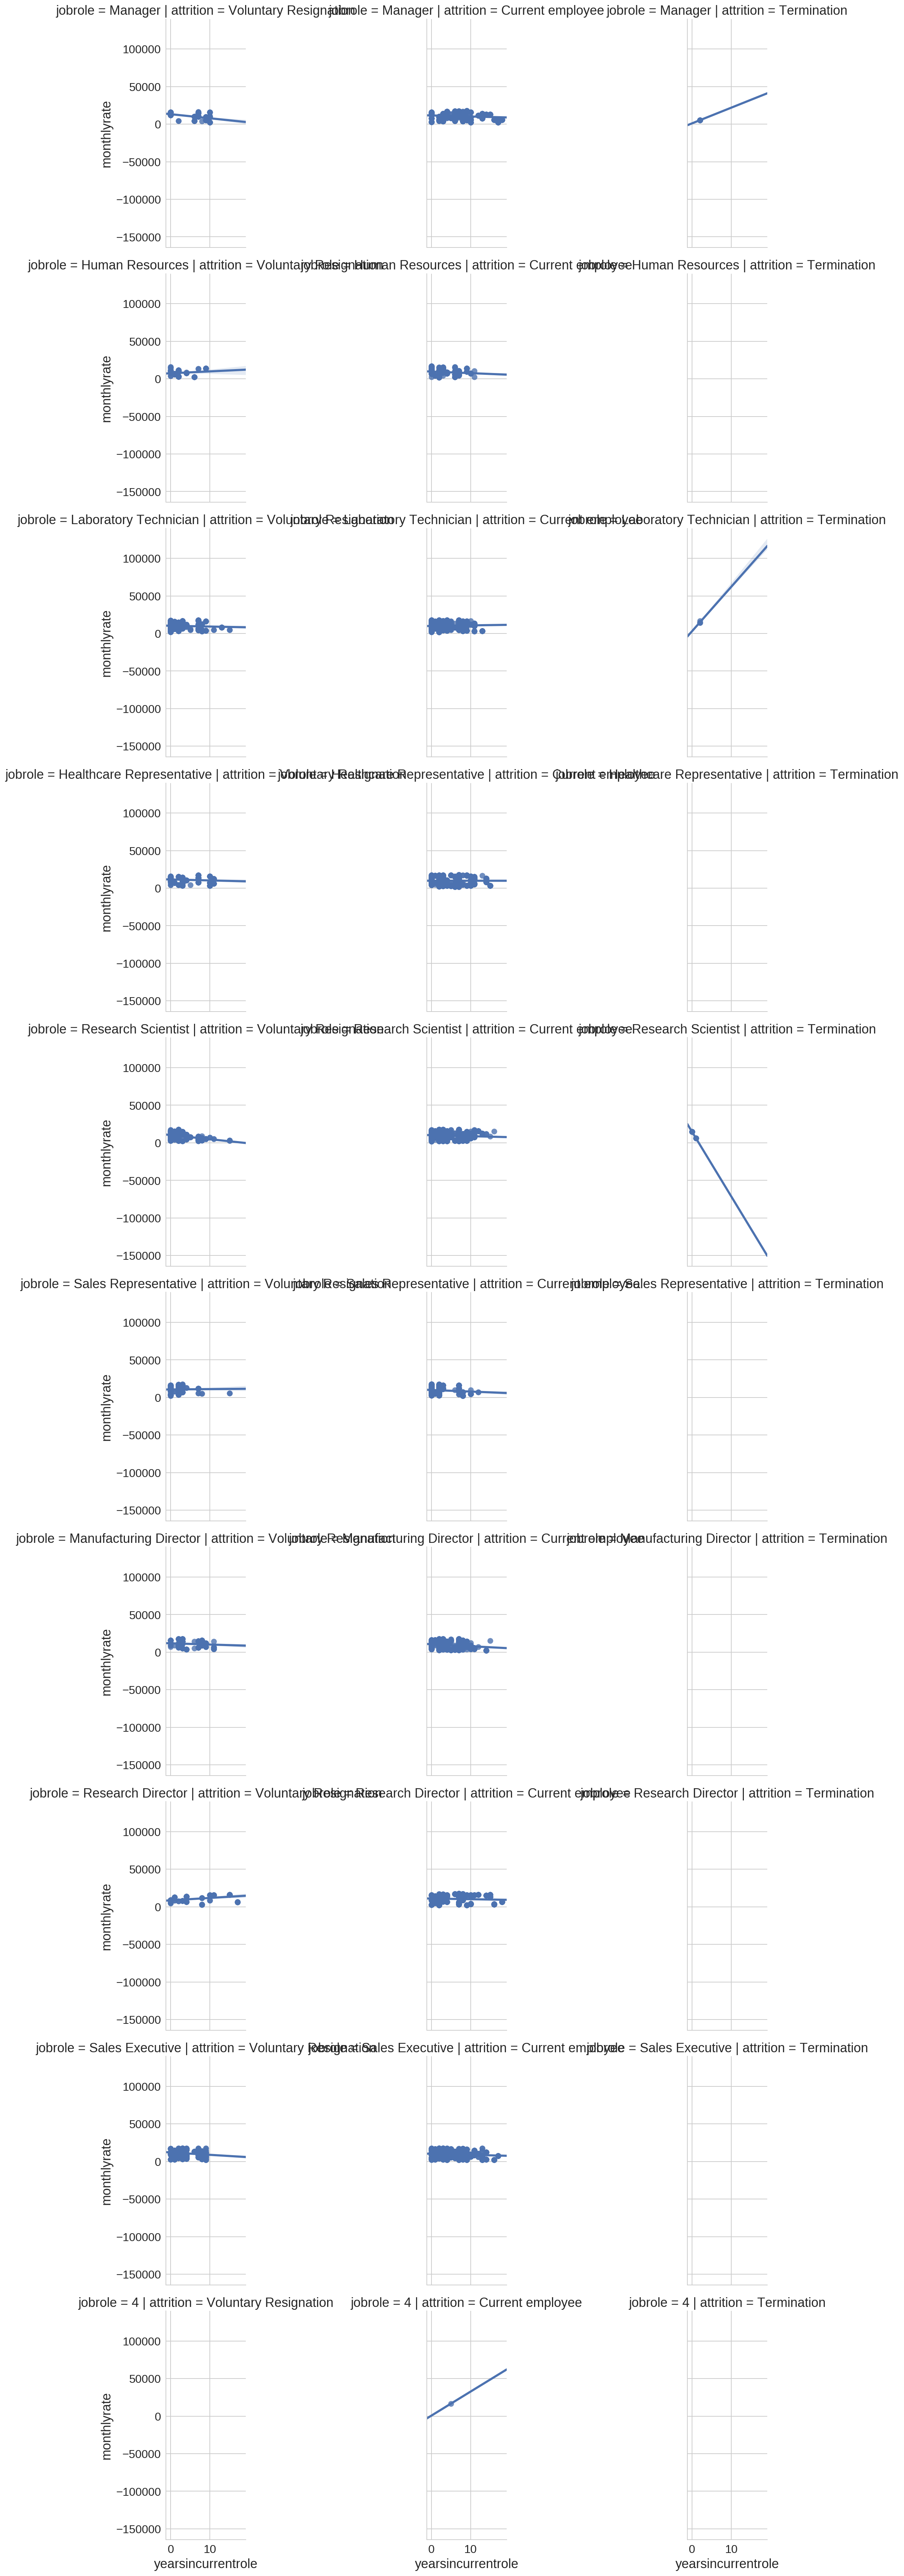

In [52]:
## Want people to stay longer.... why? - stay longer - pay increases, satisfaction increases
sns.lmplot(x='yearsincurrentrole',y='monthlyrate', data=df[df['monthlyrate']<df['monthlyrate'].std()*2.5], 
           row='jobrole', col='attrition');
## No significant change in salary based on years in role

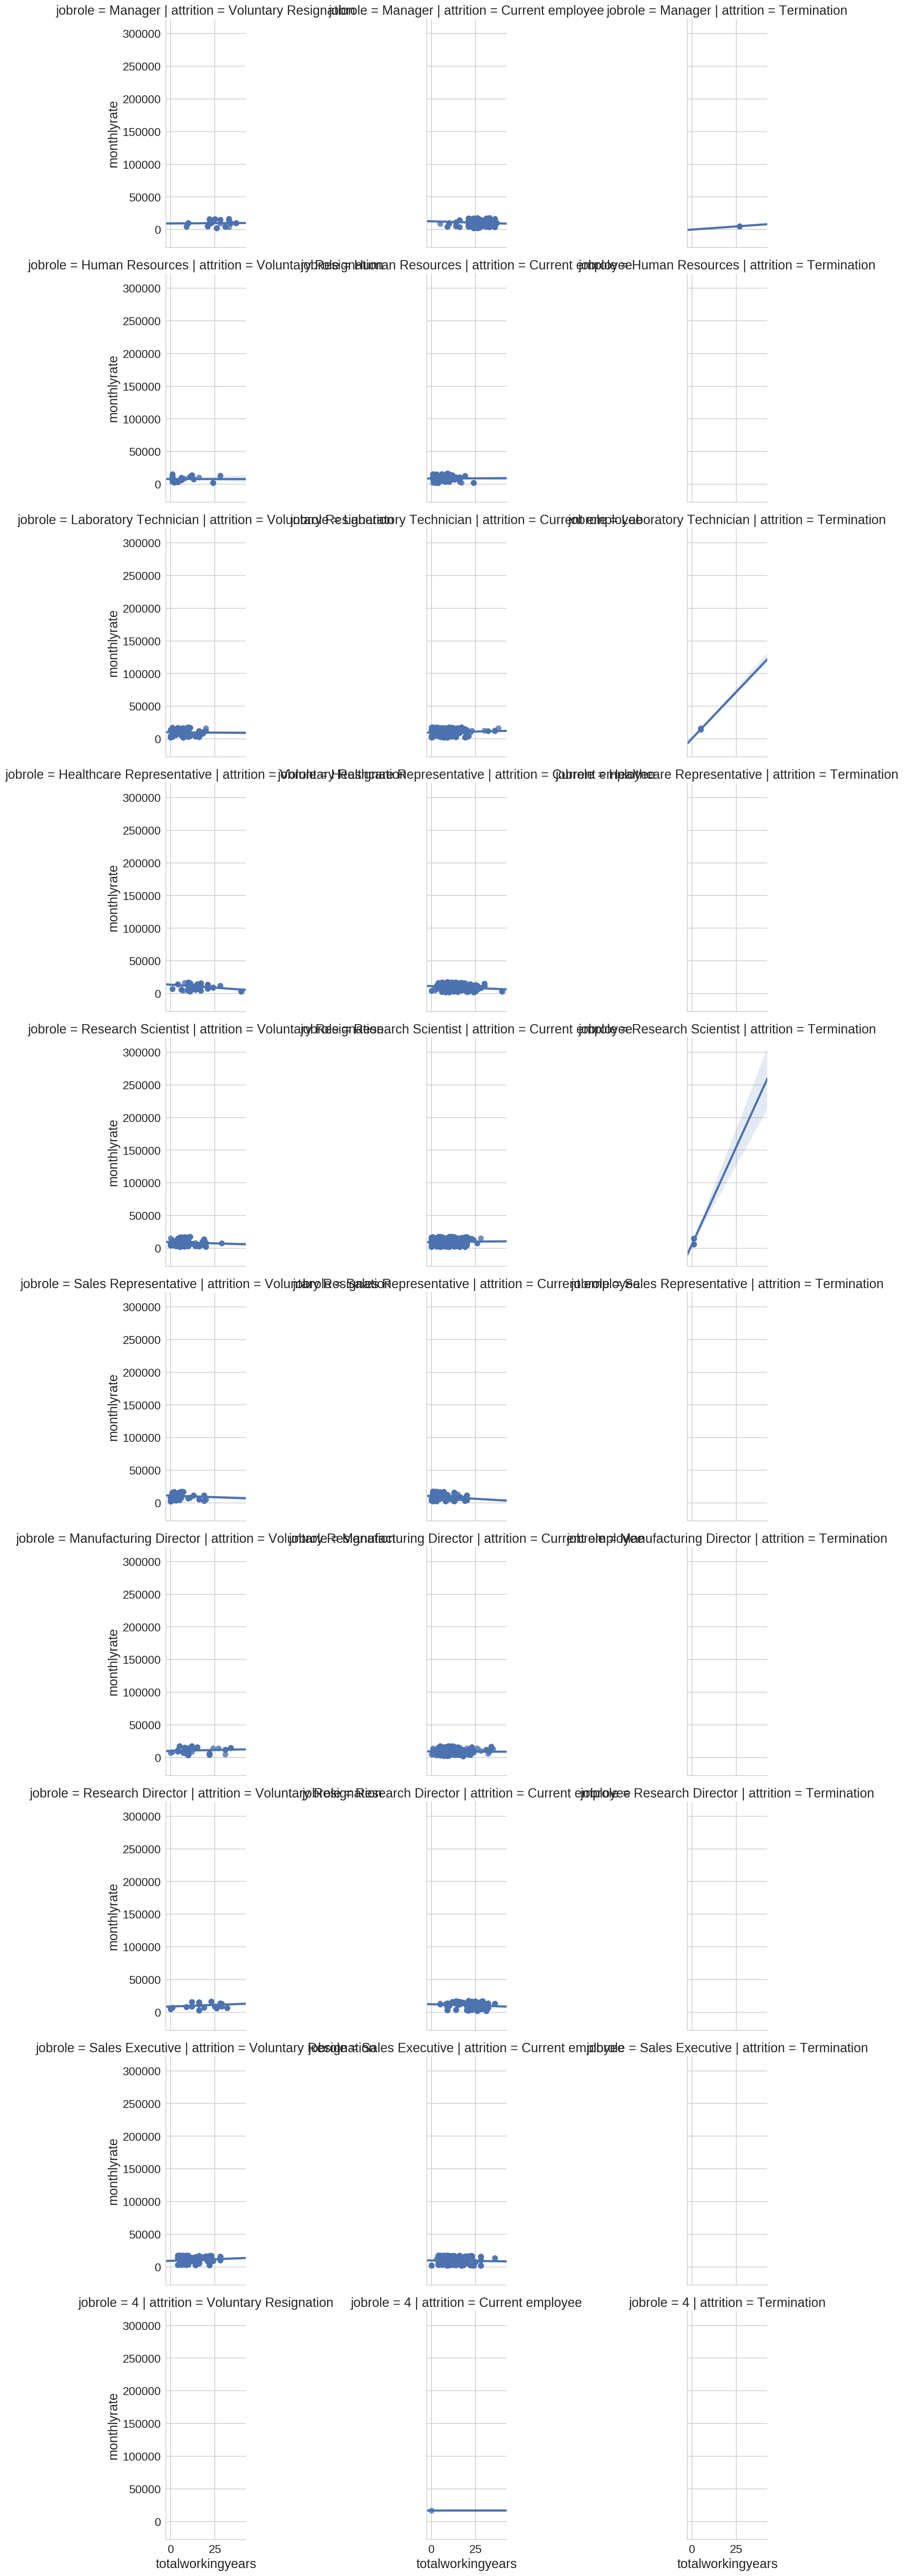

In [53]:
sns.lmplot(x='totalworkingyears',y='monthlyrate', data=df[df['monthlyrate']<df['monthlyrate'].std()*2.5], 
           row='jobrole', col='attrition');